<a href="https://colab.research.google.com/github/ACMmodel/MOSFET_model/blob/main/Examples/Design%20Methodologies/RfeedbackLNA_design/LNA_design_with_ACM2_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Set-up environment
---

In [ ]:
#@title Clear Variables
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
#@title Import Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from sympy import *

-----------------------------------------------------------------------------

# R-FEEDBACK LNA CIRCUIT ANALYSIS

Our case study in this manuscript is the R-feedback LNA
topology shown below

![LNA](https://drive.google.com/uc?export=view&id=1jpxSbJuNGNYTMgza5TBFrfBTYtHEwdse)

Whereas the feedback resistor, $R_F$ is mainly used to synthesize a real part in the input impedance, an L−type matching network composed of $L_G$ and $C'_{GS}$ is added to null the imaginary part while controlling
the input Q factor, $Q_{IN}$.

 The input impedance of the circuit, $Z_{IN}$ is given by:


\begin{align}
    Z_{IN}=L_G s + \left(\frac{1}{(C_{GS}+C_{GS}')s} // Z_P \right)
\end{align}

where $Z_P$ in the input impedance seen between the $M$ gate and its source and due to the resistive feedback which is expressed through its real and imaginary parts as follows:


\begin{equation}
    \Re(Zp)=\frac{1+\left( \frac{f}{f_c}\right)^2}{\frac{1+G_mR_O}{R_O+R_F}+\frac{1}{R_F}\left( \frac{f}{f_c}\right)^2},
    %R_{P}=\frac{(R_O+R_F)^2+(R_FR_OC_L\omega)^2}{(1+G_mR_O)(R_O+R_F)+R_F(R_OC_L\omega)^2},
\end{equation}

and

\begin{equation}
    %=\frac{R_O^2C_L(G_mR_F-1)}{(R_O+R_F)^2+(R_FR_OC_L\omega)^2}
    \Im(Zp)=-\left( 1+\frac{R_F}{R_O}\right)^2 \frac{1+\left( \frac{f}{f_c}\right)^2}{2\pi f C_L (G_mR_F-1)},
\end{equation}

with

\begin{equation}
    R_{O}=\frac{R_Lr_{DS}}{R_L+r_{DS}},
\end{equation}

and

\begin{equation}
    f_c=\frac{R_O+R_F}{2\pi R_OR_FC_L}.
\end{equation}

For an operating frequency, $f=f_0$,  well bellow the cutting frequency, $f_c$ (\ref{Rp}) and (\ref{Cp}) become,

\begin{equation}
    \Re(Zp)=R_{P}=\frac{R_O+R_F}{1+G_mR_O},
\end{equation}

and

\begin{equation}
    \Im(Zp)=-\frac{1}{2 \pi f_0 C_P},
\end{equation}

with,

\begin{equation}
    C_{P}=\frac{R_O^2C_L(G_mR_F-1)}{(R_O+R_F)^2},
\end{equation}


with $G_m$ the transconductance of the MOS.

Defining $Q_P$ as follows:


\begin{equation}
    Q_P=R_P C_T\omega_0,
\end{equation}


with


\begin{equation}
    C_{T}=C_{GS}+C_{GS}'+C_P,
\end{equation}

the matching conditions are,

\begin{equation}
    \Re(Z_{IN})=R_S=\frac{R_P}{(1+Q_P^2)},
\end{equation}

\begin{equation}
    \Im(Z_{IN})=0=L_Gs+\frac{Q_P^2}{C_Ts(1+Q_P)^2},
\end{equation}

with $R_S$ the impedance of the source generator which, for a LNA, corresponds to the antenna impedance.

The total voltage gain can be defined according to the operating frequency and the cutting frequency as,

\begin{equation}
    |G_o|=\left \lvert \frac{V_O}{V_{RF}}\right\rvert = \frac{|G_T|}{\sqrt{\left( 1+ \left( \frac{f_0}{f_c}\right)^2 \right)}},
\end{equation}

where

\begin{equation}
    |G_T|= |G_v|Q_{IN}= \frac{(G_mR_F-1)R_O}{(R_O+R_F)}\sqrt{1+Q_P^2},
\end{equation}

with $Q_{IN}=V_{I}/V_{RF}$ the input Q factor which, for $f_0 ≪ f_c$, can be simplified from (\ref{Re(Zin)}) and (\ref{Rpsimpl}) as,

\begin{equation}
    Q_{IN}=\sqrt{1+Q_P^2}=\sqrt{\frac{R_O+R_F}{R_S(1+G_mR_O)}}.
\end{equation}

As for the gain, the noise factor $F$ and the $IIP_3$ in matched conditions depend on $Q_{IN}$ and can be expressed as,

\begin{equation}
    F=1+\frac{4\left( \frac{R_F}{Q_{IN}^2} + R_S\right)^2}{Q_{IN}^2G_mR_S\left[ \frac{R_F}{Q_{IN}^2} + R_S + \frac{G_mR_SR_FR_L)}{R_F+R_L} \right]^2}
    \left[ \gamma + \frac{1}{G_mR_L} +\frac{\left( 1+\frac{Q_{IN}^2G_mR_SR_F}{R_F+Q_{IN}^2R_S}\right)^2}{G_mR_F} \right],
\end{equation}

\begin{equation}
    V_{IIP3}=\frac{2}{Q_{IN}}\sqrt{\frac{2G_m}{G_{m3}}}.
\end{equation}

---

# ACM2 - DC Characteristics

---


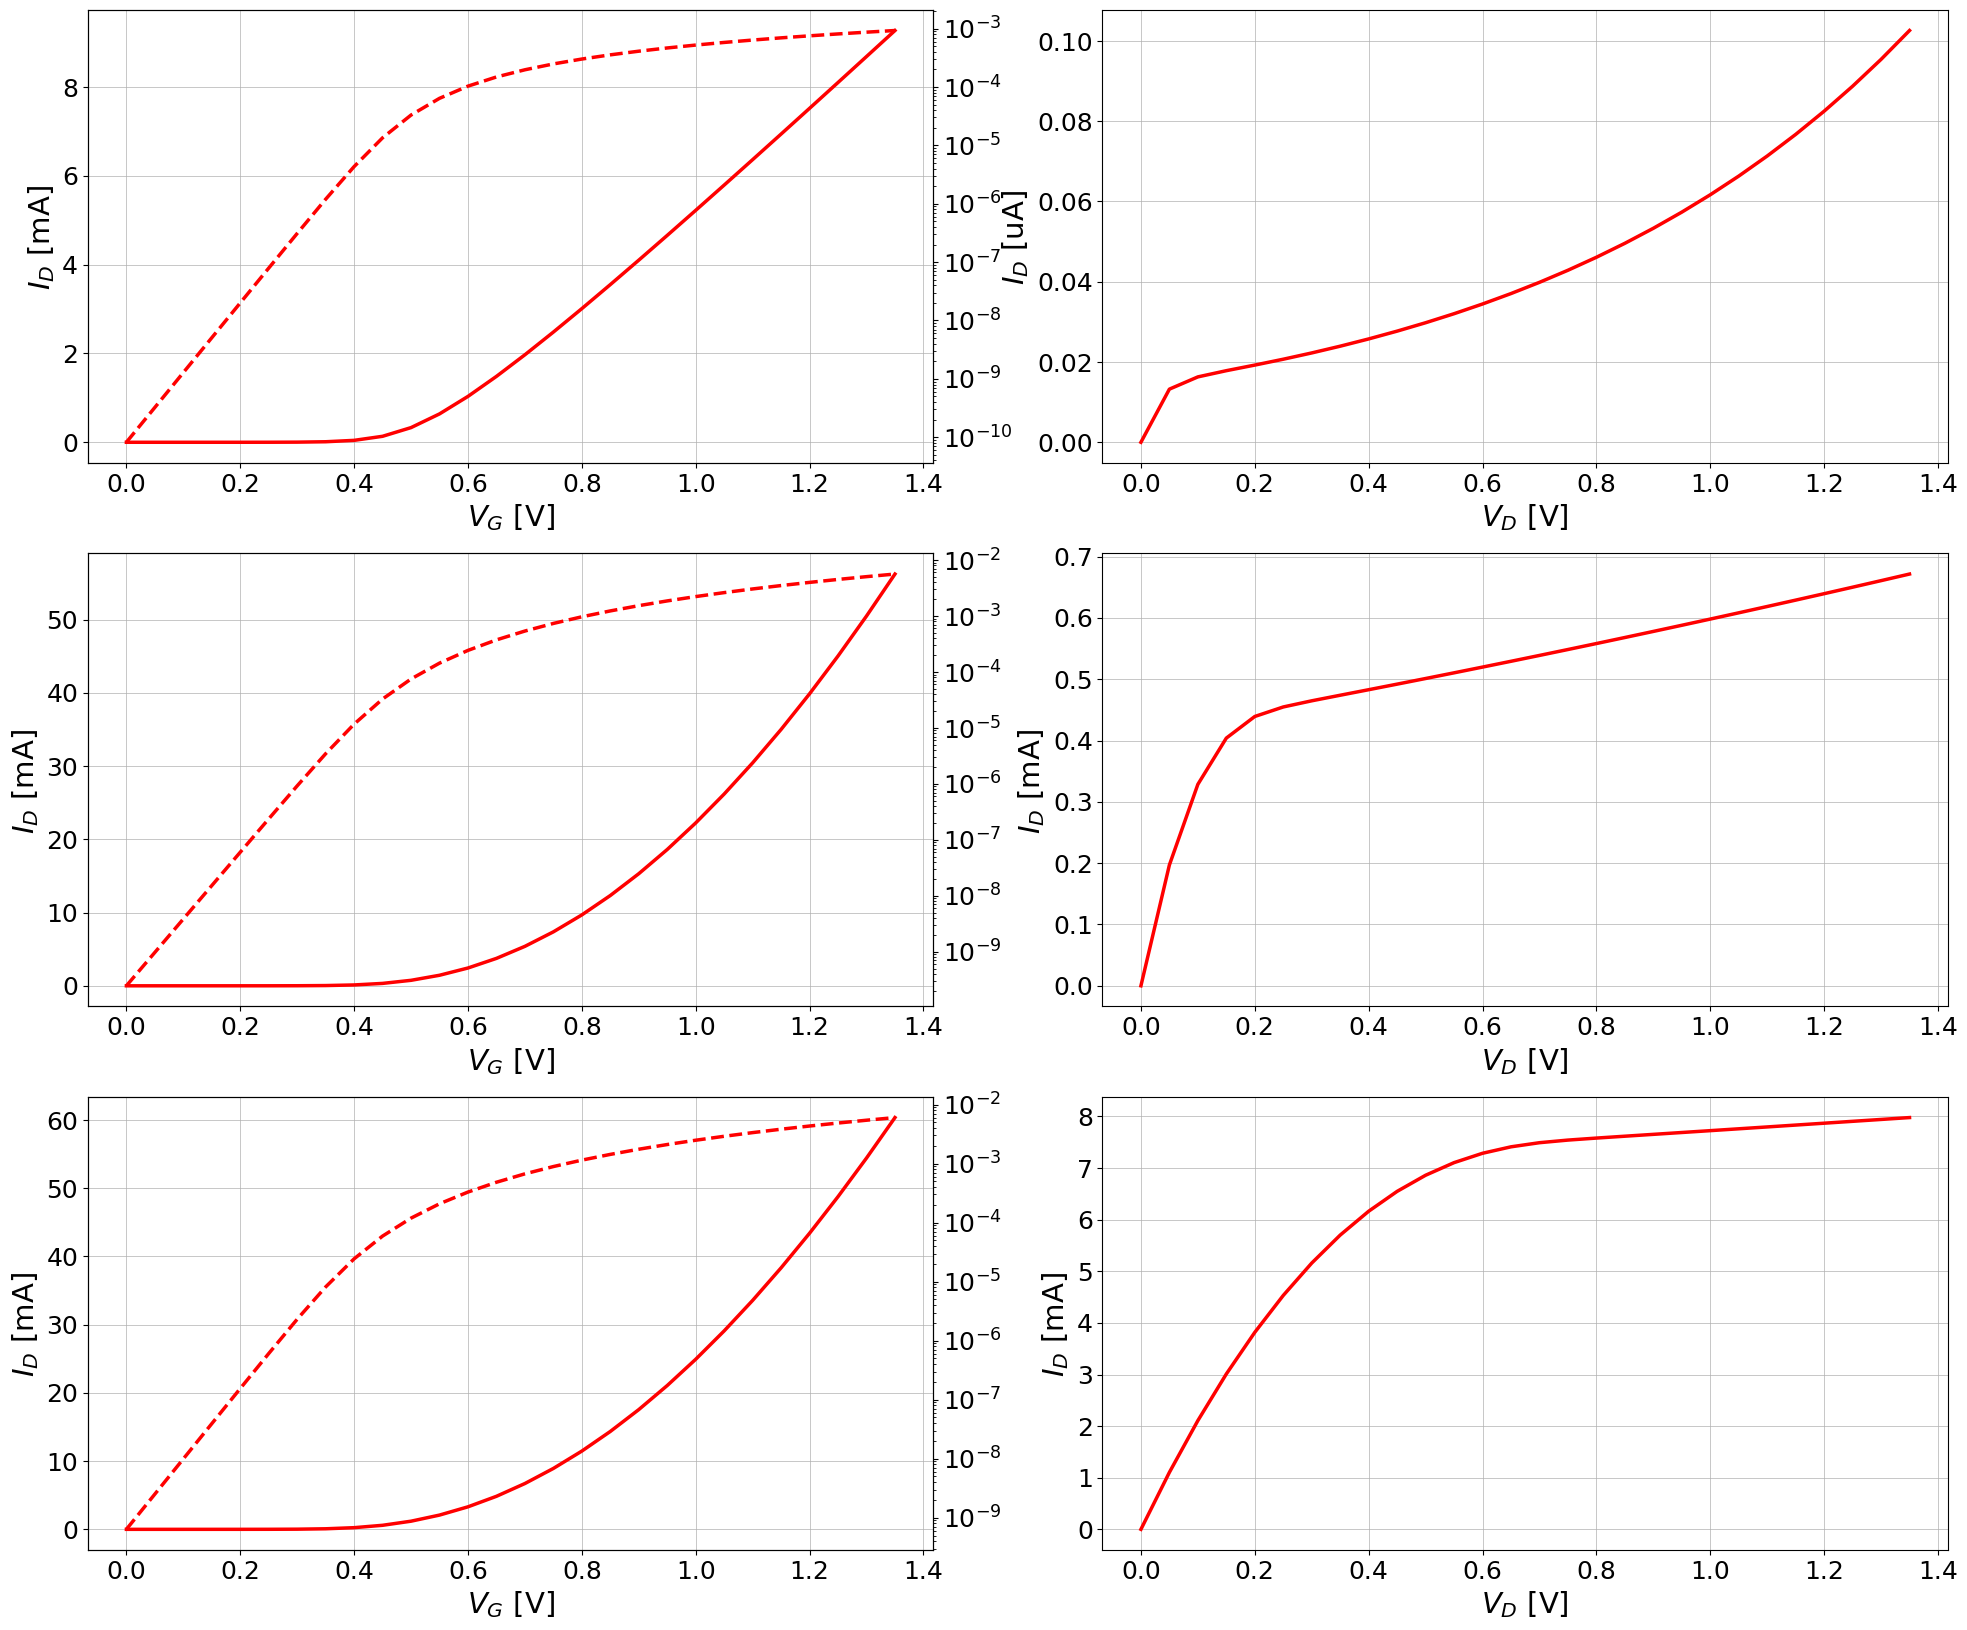

In [ ]:
#@title ID vs VG & ID vs VD

#Model parameters
VT0 = 490e-3
IS = 11.78e-6
n = 1.41
sigma = 53e-3
zeta = 7e-3

def ACM(VT0, IS, n, sigma, zeta):

  VS_ACM = np.zeros(numVD)
  VDS = VD_ACM - VS_ACM
  #Technologic parameters
  phit = 25.8e-3
  epsi = 0.01

  #defined intern Variables
  nums = len(VDS)
  numeratorD = 0
  denominatorD = 0
  X = np.zeros(nums)
  Z = 0
  VP = np.zeros(nums)
  WnD = 0
  ZnD = 0
  q1 = np.zeros(nums)
  qsat = np.zeros(nums)
  numd = len(VDS)
  Y = np.zeros(numd)
  q2 = np.zeros(numd)
  qS = np.zeros(numd)
  qD = np.zeros(numd)
  nummeratorED = 0
  denomiatorED = 0
  EnD = 0
  qn = 0

  # Algorithm 443 to solve UCCM
  def algo_443(Z):
    if Z < 0.7385:
        numeratorD = Z + (4.0/3.0)*Z*Z
        denominatorD = 1.0 + (7.0/3.0)*Z + (5.0/6.0)*Z*Z
        WnD = numeratorD / denominatorD
    else:
        numeratorD = np.log(Z)*np.log(Z) + 2.0*np.log(Z) - 3.0
        denominatorD = 7.0*np.log(Z)*np.log(Z) + 58.0*np.log(Z) + 127.0
        WnD = np.log(Z) - 24.0*(numeratorD / denominatorD)

    ZnD = np.log(Z) - WnD - np.log(WnD)
    TermD = ZnD / (1.0 + WnD)
    numeratorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - ZnD
    denominatorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - 2 * ZnD
    EnD = TermD * (numeratorED / denominatorED)
    qn = WnD * (1 + EnD)
    return qn

  for i in range(nums):

    VP[i] = (VG_ACM[i] - VT0 + sigma*(VD_ACM[i]+VS_ACM[i]))/n
  #q1 from algorithm 443 and UCCM
    X[i] = np.exp(((VP[i] -VS_ACM[i])/phit)+1)
    q1[i] = algo_443(X[i])

  #Calculating qdsat
    qsat[i] = q1[i] + 1 + (1/zeta) - np.sqrt(((1+(1/zeta))*(1+(1/zeta)))+((2*q1[i])/zeta))

  #q2 from algorithm 443 and UCCM
    Y[i] = (((q1[i]-qsat[i]))*np.exp(-VDS[i]/(phit))*np.exp(q1[i]-qsat[i]))
    q2[i] = algo_443(Y[i]) +qsat[i]

  #Normalized densities charges for a symmetric model
  #if  VDS>0:
    qS[i] = q1[i]
    qD[i] = q2[i]
  #else:
  # qD = q1
    #qS = q2
  #####################Calculating Drain Current ID###############################

  id_ACM = ((qD+qS+2)/(1+ np.sqrt((zeta*(qS-qD))*zeta*((qS-qD))+(epsi*epsi))))*(qS - qD)
  ID_ACM = IS*id_ACM
  return ID_ACM



# ID vs VG @ VD
VG_ACM = np.arange(0, 1.36, 0.05)
numVD = len(VG_ACM)
VD_ACM = (np.zeros(numVD)+0.05)
ID1 = ACM(VT0, IS, n, sigma, zeta)

VD_ACM = (np.zeros(numVD)+0.7)
ID2 = ACM(VT0, IS, n, sigma, zeta)

VD_ACM = (np.zeros(numVD)+1.35)
ID3 = ACM(VT0, IS, n, sigma, zeta)


################ VD = 50 mV ##########
fig, ax1 = plt.subplots(3,2,figsize=(24, 20))
ax2 = ax1[0,0].twinx()

ax1[0,0].plot(VG_ACM,ID1*(10e3),'r',linewidth=2.5)
ax2.semilogy(VG_ACM,ID1,'r--',linewidth=2.5)
#Labels
ax1[0,0].set_ylabel('$I_D$ [mA] ',fontsize=21)
#ax2.set_ylabel('$g_m/I_D$ ',fontsize=21)
ax1[0,0].set_xlabel('$V_G$ [V]',fontsize=21)
# X and Y axis tick font size
for label in (ax1[0,0].get_xticklabels() + ax1[0,0].get_yticklabels()+ ax2.get_yticklabels()):
	label.set_fontsize(18)
 #grid
ax1[0,0].grid(linewidth=0.5)
#ax1[0,0].legend(loc=2,fontsize=20)

################ VD = 600 mV ##########

ax3 = ax1[1,0].twinx()
ax1[1,0].plot(VG_ACM,ID2*(10e3),'r',linewidth=2.5)
ax3.semilogy(VG_ACM,ID2,'r--',linewidth=2.5)
#Labels
ax1[1,0].set_ylabel('$I_D$ [mA] ',fontsize=21)
#ax2.set_ylabel('$g_m/I_D$ ',fontsize=21)
ax1[1,0].set_xlabel('$V_G$ [V]',fontsize=21)
# X and Y axis tick font size
for label in (ax1[1,0].get_xticklabels() + ax1[1,0].get_yticklabels()+ ax3.get_yticklabels()):
	label.set_fontsize(18)

#grid
ax1[1,0].grid(linewidth=0.5)
#ax1[1,0].legend(loc=2,fontsize=20)


################ VD = 1.2 V ##########

ax4 = ax1[2,0].twinx()
ax1[2,0].plot(VG_ACM,ID3*(10e3),'r',linewidth=2.5)
ax4.semilogy(VG_ACM,ID3,'r--',linewidth=2.5)

#Labels
ax1[2,0].set_ylabel('$I_D$ [mA] ',fontsize=21)
#ax2.set_ylabel('$g_m/I_D$ ',fontsize=21)
ax1[2,0].set_xlabel('$V_G$ [V]',fontsize=21)
# X and Y axis tick font size
for label in (ax1[2,0].get_xticklabels() + ax1[2,0].get_yticklabels()+ ax4.get_yticklabels()):
	label.set_fontsize(18)

#grid
ax1[2,0].grid(linewidth=0.5)
#ax1[2,0].legend(loc=2,fontsize=20)

#####################################################
# ID vs VD @ VG
VD_ACM = np.arange(0, 1.36, 0.05)
numVD = len(VD_ACM)
VG_ACM = (np.zeros(numVD)+0.185)

ID4 = ACM(VT0, IS, n, sigma, zeta)

VG_ACM = (np.zeros(numVD)+0.7)
ID5 = ACM(VT0, IS, n, sigma, zeta)

VG_ACM = (np.zeros(numVD)+1.5)
ID6 = ACM(VT0, IS, n, sigma, zeta)


################ VG = 185 mV ##########

ax1[0,1].plot(VD_ACM,ID4*(10**6),'r',linewidth=2.5)
#Labels
ax1[0,1].set_ylabel('$I_D$ [uA] ',fontsize=21)
#ax2.set_ylabel('$g_m/I_D$ ',fontsize=21)
ax1[0,1].set_xlabel('$V_D$ [V]',fontsize=21)
# X and Y axis tick font size
for label in (ax1[0,1].get_xticklabels() + ax1[0,1].get_yticklabels()):
	label.set_fontsize(18)
#grid
ax1[0,1].grid(linewidth=0.5)
#ax1[0,1].legend(loc=2,fontsize=20)

################ VG = 700 mV ##########

ax1[1,1].plot(VD_ACM,ID5*(10**3),'r',linewidth=2.5)
#Labels
ax1[1,1].set_ylabel('$I_D$ [mA] ',fontsize=21)
#ax2.set_ylabel('$g_m/I_D$ ',fontsize=21)
ax1[1,1].set_xlabel('$V_D$ [V]',fontsize=21)
# X and Y axis tick font size
for label in (ax1[1,1].get_xticklabels() + ax1[1,1].get_yticklabels()):
	label.set_fontsize(18)
#grid
ax1[1,1].grid(linewidth=0.5)
#ax1[1,1].legend(loc=2,fontsize=20)

################ VG = 1.35 V ##########

ax1[2,1].plot(VD_ACM,ID6*(10**3),'r',linewidth=2.5)
#Labels
ax1[2,1].set_ylabel('$I_D$ [mA] ',fontsize=21)
#ax2.set_ylabel('$g_m/I_D$ ',fontsize=21)
ax1[2,1].set_xlabel('$V_D$ [V]',fontsize=21)
# X and Y axis tick font size
for label in (ax1[2,1].get_xticklabels() + ax1[2,1].get_yticklabels()):
	label.set_fontsize(18)
#grid
ax1[2,1].grid(linewidth=0.5)
#ax1[2,1].legend(loc=2,fontsize=20)

--------------------------------------------------------------------------------

In [ ]:
#@title Zeta Extraction
import numpy as np
###################Simulation input variables##########################

idsat = float(input("Enter the value of idsat: "))  # this value extracted from the PDK transistor
# Simulation input voltages
VG_ACM = np.arange(0, 1.505, 0.05)
numVD = len(VG_ACM)
VD_ACM= (np.zeros(numVD)+1.505)
VS_ACM = np.zeros(numVD)
VDS = VD_ACM - VS_ACM

#Model parameters
VT0 = 490e-3
IS = 11.78e-6
n = 1.41
sigma = 53e-3
zeta = 1e-9
#######################################################################

#Transistor Dimensions
W = 10e-6
L = 0.12e-6

#Technologic parameters
phit = 25.8e-3
epsi = 0.01

#defined intern Variables
nums = len(VDS)
numeratorD = 0
denominatorD = 0
X = np.zeros(nums)
Z = 0
VP = np.zeros(nums)
WnD = 0
ZnD = 0
q1 = np.zeros(nums)
qsat = np.zeros(nums)
numd = len(VDS)
Y = np.zeros(numd)
q2 = np.zeros(numd)
qS = np.zeros(numd)
qD = np.zeros(numd)
nummeratorED = 0
denomiatorED = 0
EnD = 0
qn = 0

# Algorithm 443 to solve UCCM
def algo_443(Z):
  if Z < 0.7385:
      numeratorD = Z + (4.0/3.0)*Z*Z
      denominatorD = 1.0 + (7.0/3.0)*Z + (5.0/6.0)*Z*Z
      WnD = numeratorD / denominatorD
  else:
      numeratorD = np.log(Z)*np.log(Z) + 2.0*np.log(Z) - 3.0
      denominatorD = 7.0*np.log(Z)*np.log(Z) + 58.0*np.log(Z) + 127.0
      WnD = np.log(Z) - 24.0*(numeratorD / denominatorD)

  ZnD = np.log(Z) - WnD - np.log(WnD)
  TermD = ZnD / (1.0 + WnD)
  numeratorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - ZnD
  denominatorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - 2 * ZnD
  EnD = TermD * (numeratorED / denominatorED)
  qn = WnD * (1 + EnD)
  return qn

for i in range(nums):

  VP[i] = (VG_ACM[i] - VT0 + sigma*(VD_ACM[i]+VS_ACM[i]))/n
#q1 from algorithm 443 and UCCM
  X[i] = np.exp(((VP[i] -VS_ACM[i])/phit)+1)
  q1[i] = algo_443(X[i])

#Calculating qdsat
  qsat[i] = q1[i] + 1 + (1/zeta) - np.sqrt(((1+(1/zeta))*(1+(1/zeta)))+((2*q1[i])/zeta))

#q2 from algorithm 443 and UCCM
  Y[i] = (((q1[i]-qsat[i]))*np.exp(-VDS[i]/(phit))*np.exp(q1[i]-qsat[i]))
  q2[i] = algo_443(Y[i]) +qsat[i]

#Normalized densities charges for a symmetric model
  qS = q1
  qD = q2

#####################Calculating Drain Current ID###############################

id_ACM = ((qD+qS+2)/(1+ np.sqrt((zeta*(qS-qD))*zeta*((qS-qD))+(epsi*epsi))))*(qS - qD)
ID_ACM = IS*id_ACM

qSmax = max(qS)
zeta = (2/idsat)*(qSmax+1 - np.sqrt(idsat+1))

print("\n" + "="*50)
print(f"qs: {qSmax:1f} ")
print(f"zeta: {zeta:1f} ")



Enter the value of idsat: 687

qs: 27.637530 
zeta: 0.007010 


---------------------------------------------------------------------------

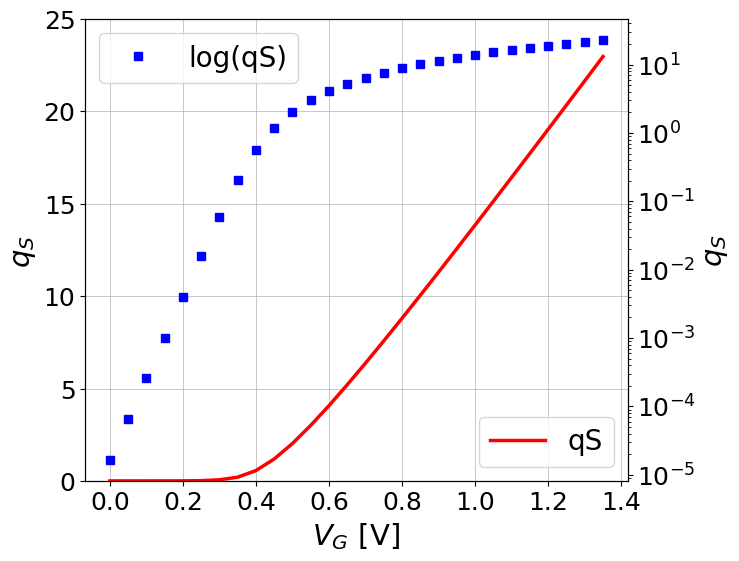

In [ ]:
#@title qS vs VG @ VD = 1V

# Simulation input voltages
VG_ACM = np.arange(0, 1.36, 0.05)
numVD = len(VG_ACM)
VD_ACM= (np.zeros(numVD)+1)
VS_ACM = np.zeros(numVD)
VDS = VD_ACM - VS_ACM
VSD = -VDS
#VXB = np.minimum(VS,VD)
#VYB = np.maximum(VDS,VSD)

#Transistor Dimensions
W = 10e-6
L = 0.12e-6

#Model parameters
VT0 = 490e-3
IS = 11.78e-6
n = 1.41
sigma = 53e-3
zeta = 7e-3

#Technologic parameters
phit = 25.8e-3
tox = 3.98e-9
e0 = 8.85e-12
eox = 3.9
Cox = (eox*e0)/tox
mob = (IS*L)/(Cox*n*phit*phit*W*0.5) #mobility [m^2/V.s]
epsi = 0.01

#defined intern Variables
nums = len(VDS)
numeratorD = 0
denominatorD = 0
X = np.zeros(nums)
Z = 0
VP = np.zeros(nums)
WnD = 0
ZnD = 0
q1 = np.zeros(nums)
qsat = np.zeros(nums)
numd = len(VDS)
Y = np.zeros(numd)
q2 = np.zeros(numd)
qS = np.zeros(numd)
qD = np.zeros(numd)
nummeratorED = 0
denomiatorED = 0
EnD = 0
qn = 0

# Algorithm 443 to solve UCCM
def algo_443(Z):
  if Z < 0.7385:
      numeratorD = Z + (4.0/3.0)*Z*Z
      denominatorD = 1.0 + (7.0/3.0)*Z + (5.0/6.0)*Z*Z
      WnD = numeratorD / denominatorD
  else:
      numeratorD = np.log(Z)*np.log(Z) + 2.0*np.log(Z) - 3.0
      denominatorD = 7.0*np.log(Z)*np.log(Z) + 58.0*np.log(Z) + 127.0
      WnD = np.log(Z) - 24.0*(numeratorD / denominatorD)

  ZnD = np.log(Z) - WnD - np.log(WnD)
  TermD = ZnD / (1.0 + WnD)
  numeratorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - ZnD
  denominatorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - 2 * ZnD
  EnD = TermD * (numeratorED / denominatorED)
  qn = WnD * (1 + EnD)
  return qn

for i in range(nums):

  VP[i] = (VG_ACM[i] - VT0 + sigma*(VD_ACM[i]+VS_ACM[i]))/n
#q1 from algorithm 443 and UCCM
  X[i] = np.exp(((VP[i] -VS_ACM[i])/phit)+1)
  q1[i] = algo_443(X[i])

#Calculating qdsat
  qsat[i] = q1[i] + 1 + (1/zeta) - np.sqrt(((1+(1/zeta))*(1+(1/zeta)))+((2*q1[i])/zeta))

#q2 from algorithm 443 and UCCM
  Y[i] = (((q1[i]-qsat[i]))*np.exp(-VDS[i]/(phit))*np.exp(q1[i]-qsat[i]))
  q2[i] = algo_443(Y[i]) +qsat[i]

#Normalized densities charges for a symmetric model
#if  VDS>0:
  qS = q1
  qD = q2
#else:
 # qD = q1
  #qS = q2
#####################Calculating Drain Current ID###############################

id_ACM = ((qD+qS+2)/(1+ np.sqrt((zeta*(qS-qD))*zeta*((qS-qD))+(epsi*epsi))))*(qS - qD)
ID_ACM = IS*id_ACM


fig, ax1 = plt.subplots(figsize=(7, 6))
ax2 = ax1.twinx()


ax1.plot(VG_ACM,qS,'r',linewidth=2.5, label='qS')
ax2.semilogy(VG_ACM,qS,'bs',linewidth=2.5, label='log(qS)')


#ax2.plot(VG_IHP,gmID_IHP,'r--',linewidth=2.5)
#ax2.plot(VG_smooth,gmID_smooth,'r',linewidth=2.5)
#ax1.set_xlim(-0.5, 1.35)
ax1.set_ylim(0, 25)
#Labels
ax1.set_ylabel('$q_S$ ',fontsize=21)
ax2.set_ylabel('$q_S$',fontsize=21)
ax1.set_xlabel('$V_G$ [V]',fontsize=21)


# X and Y axis tick font size
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()+ ax2.get_yticklabels()):
		label.set_fontsize(18)

#grid
ax1.grid(linewidth=0.5)
ax1.legend(loc=4,fontsize=20)
ax2.legend(loc=2,fontsize=20)


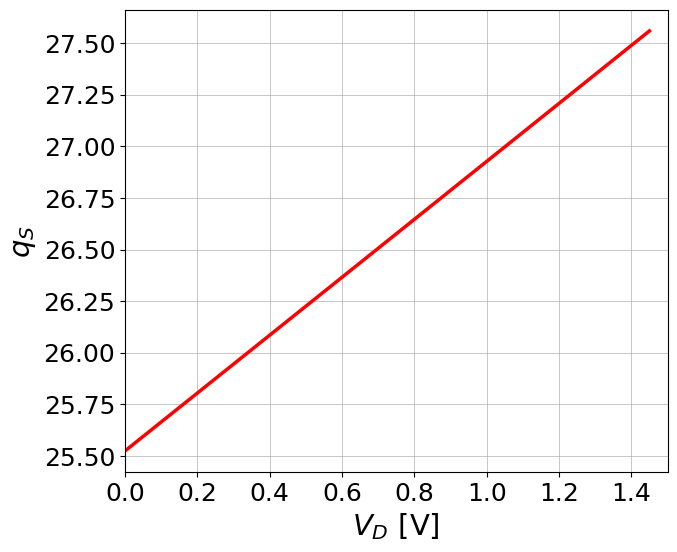

In [ ]:
#@title qS vs VD @ VG = 1.5V

# Simulation input voltages
VD_ACM = np.arange(0, 1.5, 0.05)
numVD = len(VD_ACM)
VG_ACM= (np.zeros(numVD)+1.5)
VS_ACM = np.zeros(numVD)
VDS = VD_ACM - VS_ACM
VSD = -VDS
#VXB = np.minimum(VS,VD)
#VYB = np.maximum(VDS,VSD)

#Transistor Dimensions
W = 10e-6
L = 0.12e-6

#Model parameters
VT0 = 490e-3
IS = 11.78e-6
n = 1.41
sigma = 53e-3
zeta = 7e-3

#Technologic parameters
phit = 25.8e-3
tox = 3.98e-9
e0 = 8.85e-12
eox = 3.9
Cox = (eox*e0)/tox
mob = (IS*L)/(Cox*n*phit*phit*W*0.5) #mobility [m^2/V.s]
epsi = 0.01

#defined intern Variables
nums = len(VDS)
numeratorD = 0
denominatorD = 0
X = np.zeros(nums)
Z = 0
VP = np.zeros(nums)
WnD = 0
ZnD = 0
q1 = np.zeros(nums)
qsat = np.zeros(nums)
numd = len(VDS)
Y = np.zeros(numd)
q2 = np.zeros(numd)
qS = np.zeros(numd)
qD = np.zeros(numd)
nummeratorED = 0
denomiatorED = 0
EnD = 0
qn = 0

# Algorithm 443 to solve UCCM
def algo_443(Z):
  if Z < 0.7385:
      numeratorD = Z + (4.0/3.0)*Z*Z
      denominatorD = 1.0 + (7.0/3.0)*Z + (5.0/6.0)*Z*Z
      WnD = numeratorD / denominatorD
  else:
      numeratorD = np.log(Z)*np.log(Z) + 2.0*np.log(Z) - 3.0
      denominatorD = 7.0*np.log(Z)*np.log(Z) + 58.0*np.log(Z) + 127.0
      WnD = np.log(Z) - 24.0*(numeratorD / denominatorD)

  ZnD = np.log(Z) - WnD - np.log(WnD)
  TermD = ZnD / (1.0 + WnD)
  numeratorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - ZnD
  denominatorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - 2 * ZnD
  EnD = TermD * (numeratorED / denominatorED)
  qn = WnD * (1 + EnD)
  return qn

for i in range(nums):

  VP[i] = (VG_ACM[i] - VT0 + sigma*(VD_ACM[i]+VS_ACM[i]))/n
#q1 from algorithm 443 and UCCM
  X[i] = np.exp(((VP[i] -VS_ACM[i])/phit)+1)
  q1[i] = algo_443(X[i])

#Calculating qdsat
  qsat[i] = q1[i] + 1 + (1/zeta) - np.sqrt(((1+(1/zeta))*(1+(1/zeta)))+((2*q1[i])/zeta))

#q2 from algorithm 443 and UCCM
  Y[i] = (((q1[i]-qsat[i]))*np.exp(-VDS[i]/(phit))*np.exp(q1[i]-qsat[i]))
  q2[i] = algo_443(Y[i]) +qsat[i]

#Normalized densities charges for a symmetric model
#if  VDS>0:
  qS = q1
  qD = q2
#else:
 # qD = q1
  #qS = q2
#####################Calculating Drain Current ID###############################

id_ACM = ((qD+qS+2)/(1+ np.sqrt((zeta*(qS-qD))*zeta*((qS-qD))+(epsi*epsi))))*(qS - qD)
ID_ACM = IS*id_ACM

############################Transconductances###################################

fig, ax1 = plt.subplots(figsize=(7, 6))

ax1.plot(VD_ACM,qS,'r',linewidth=2.5)



#Labels
ax1.set_ylabel('$q_S$ ',fontsize=21)
ax1.set_xlabel('$V_D$ [V]',fontsize=21)
ax1.set_xlim(0, 1.5)

# X and Y axis tick font size
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
		label.set_fontsize(18)

#grid
ax1.grid(linewidth=0.5)
#ax1.legend(loc=4,fontsize=20)


---

# ACM2 - Small-signal model
---


##Transconductances in saturation

Transconductances, defined as the derivatives of the current with respect to the control voltages, are crucial for reliable and efficient convergence of the DC analysis.

\begin{align}
g_{msat} = \frac{\partial I_{Dsat}}{\partial V_G} ;  g_{msat3} = - \frac{\partial^3 I_{Dsat}}{\partial V_G^3} ;  g_{dsat} = \frac{\partial I_D}{\partial V_D} ;
\end{align}

In terms of $q_s$:

\begin{align}
g_{msat} = \frac{2 I_S}{n \phi_t} \frac{q_s}{1+\zeta(q_s +1) }
\end{align}


\begin{align}
g_{msat3} = \frac{16 I_S}{(n \phi_t)^3} \frac{q_s}{(q_s +1)^3} \frac{2 - 2 \zeta q_s -3 \zeta q_s^2}{(\zeta q_s +2)^4}
\end{align}


\begin{align}
g_{dsat} = \frac{\sigma}{n} \frac{2 I_S}{\phi_t} \frac{q_s}{1+\zeta(q_s +1) }
\end{align}

But also can be expressed in terms of $i_{dsat}$ trough the change of variable in $q_s = \sqrt{1+i_{dsat}} - 1$

\begin{align}
g_{msat} = \frac{2 I_S}{n \phi_t} \frac{\sqrt{1+i_{dsat}}-1}{1+\zeta \sqrt{i_{dsat}}}
\end{align}

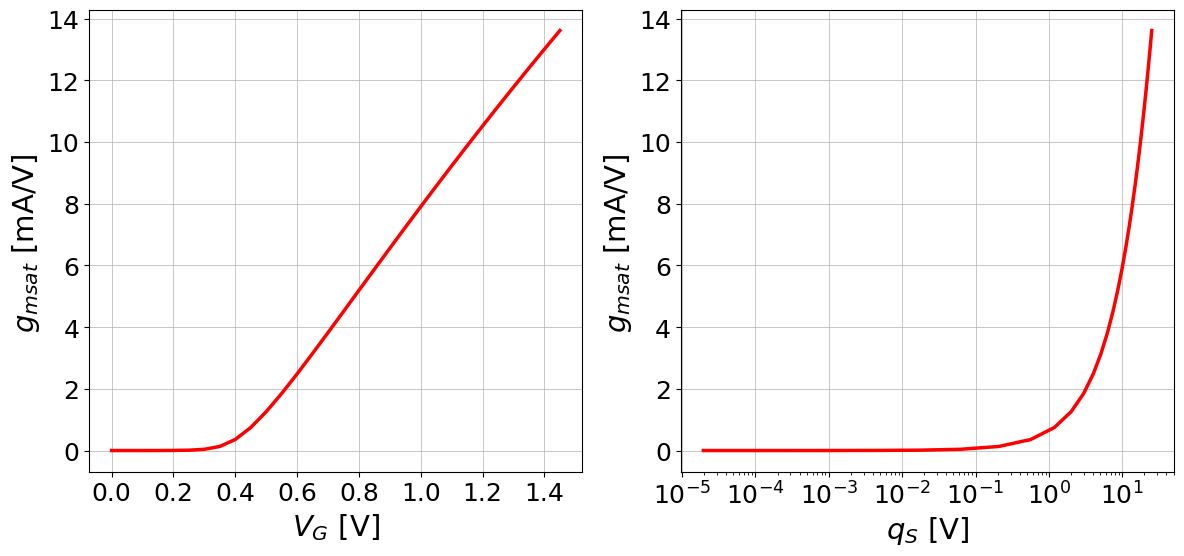

In [ ]:
#@title gmsat vs VG & qS @ VD = 1 V

# Simulation input voltages
VG_ACM = np.arange(0, 1.5, 0.05)
numVD = len(VG_ACM)
VD_ACM= (np.zeros(numVD)+1)
VS_ACM = np.zeros(numVD)
VDS = VD_ACM - VS_ACM
VSD = -VDS

#Transistor Dimensions
W = 10e-6
L = 0.12e-6

#Model parameters
VT0 = 490e-3
IS = 11.78e-6
n = 1.43
sigma = 53e-3
zeta = 7e-3

#Technologic parameters
phit = 25.8e-3
tox = 3.98e-9
e0 = 8.85e-12
eox = 3.9
Cox = (eox*e0)/tox
mob = (IS*L)/(Cox*n*phit*phit*W*0.5) #mobility [m^2/V.s]
#vsat = (mob*phit)/(L*zeta)  #[m^2/s]
epsi = 0.01

#defined intern Variables
nums = len(VDS)
numeratorD = 0
denominatorD = 0
X = np.zeros(nums)
Z = 0
VP = np.zeros(nums)
WnD = 0
ZnD = 0
q1 = np.zeros(nums)
qsat = np.zeros(nums)
numd = len(VDS)
Y = np.zeros(numd)
q2 = np.zeros(numd)
qS = np.zeros(numd)
qD = np.zeros(numd)
nummeratorED = 0
denomiatorED = 0
EnD = 0
qn = 0

# Algorithm 443 to solve UCCM
def algo_443(Z):
  if Z < 0.7385:
      numeratorD = Z + (4.0/3.0)*Z*Z
      denominatorD = 1.0 + (7.0/3.0)*Z + (5.0/6.0)*Z*Z
      WnD = numeratorD / denominatorD
  else:
      numeratorD = np.log(Z)*np.log(Z) + 2.0*np.log(Z) - 3.0
      denominatorD = 7.0*np.log(Z)*np.log(Z) + 58.0*np.log(Z) + 127.0
      WnD = np.log(Z) - 24.0*(numeratorD / denominatorD)

  ZnD = np.log(Z) - WnD - np.log(WnD)
  TermD = ZnD / (1.0 + WnD)
  numeratorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - ZnD
  denominatorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - 2 * ZnD
  EnD = TermD * (numeratorED / denominatorED)
  qn = WnD * (1 + EnD)
  return qn

for i in range(nums):

  VP[i] = (VG_ACM[i] - VT0 + sigma*(VD_ACM[i]+VS_ACM[i]))/n
#q1 from algorithm 443 and UCCM
  X[i] = np.exp(((VP[i] -VS_ACM[i])/phit)+1)
  q1[i] = algo_443(X[i])

#Calculating qdsat
  qsat[i] = q1[i] + 1 + (1/zeta) - np.sqrt(((1+(1/zeta))*(1+(1/zeta)))+((2*q1[i])/zeta))

#q2 from algorithm 443 and UCCM
  Y[i] = (((q1[i]-qsat[i]))*np.exp(-VDS[i]/(phit))*np.exp(q1[i]-qsat[i]))
  q2[i] = algo_443(Y[i]) +qsat[i]

#Normalized densities charges for a symmetric model
  qS = q1
  qD = q2
#####################Calculating Drain Current ID###############################

id_ACM = ((qD+qS+2)/(1+ np.sqrt((zeta*(qS-qD))*zeta*((qS-qD))+(epsi*epsi))))*(qS - qD)
ID_ACM = IS*id_ACM


###########################Calculating Transconductance#########################

#gmsat= 2*(IS/(n*phit))*((np.sqrt(1+id_ACM)-1)/(1+zeta*np.sqrt(1+id_ACM)))
gmsat= 2*(IS/(n*phit))*((qS)/(1+zeta*(1+qS)))

#################Fig plot#########################
fig, ax1 = plt.subplots(1,2,figsize=(14, 6))

ax1[0].plot(VG_ACM,gmsat*(10**3),'r',linewidth=2.5)

#Labels
ax1[0].set_ylabel('$g_{msat}$ [mA/V] ',fontsize=21)
ax1[0].set_xlabel('$V_G$ [V]',fontsize=21)


# X and Y axis tick font size
for label in (ax1[0].get_xticklabels() + ax1[0].get_yticklabels()):
		label.set_fontsize(18)

#grid
ax1[0].grid(linewidth=0.5)
#ax1[0].legend(loc=4,fontsize=20)


ax1[1].semilogx(qS,gmsat*(10**3),'r',linewidth=2.5)

#Labels
ax1[1].set_ylabel('$g_{msat}$ [mA/V] ',fontsize=21)
ax1[1].set_xlabel('$q_S$ [V]',fontsize=21)


# X and Y axis tick font size
for label in (ax1[1].get_xticklabels() + ax1[1].get_yticklabels()):
		label.set_fontsize(18)

#grid
ax1[1].grid(linewidth=0.5)
#ax1[1].legend(loc=4,fontsize=20)

(1e-05, 20.0)

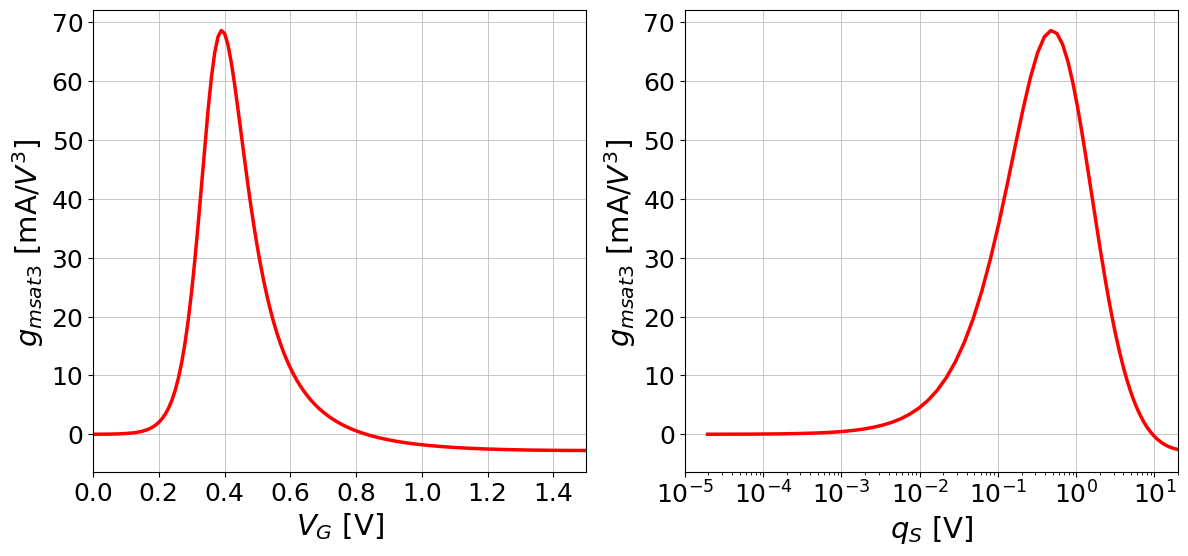

In [ ]:
#@title gmsat3 vs VG & qS @ VD = 1 V

# Simulation input voltages
VG_ACM = np.arange(0, 1.6, 0.01)
numVD = len(VG_ACM)
VD_ACM= (np.zeros(numVD)+1)
VS_ACM = np.zeros(numVD)
VDS = VD_ACM - VS_ACM
VSD = -VDS

#Transistor Dimensions
W = 10e-6
L = 0.12e-6

#Model parameters
VT0 = 490e-3
IS = 11.78e-6
n = 1.43
sigma = 53e-3
zeta = 7e-3

#Technologic parameters
phit = 25.8e-3
tox = 3.98e-9
e0 = 8.85e-12
eox = 3.9
Cox = (eox*e0)/tox
mob = (IS*L)/(Cox*n*phit*phit*W*0.5) #mobility [m^2/V.s]
#vsat = (mob*phit)/(L*zeta)  #[m^2/s]
epsi = 0.01

#defined intern Variables
nums = len(VDS)
numeratorD = 0
denominatorD = 0
X = np.zeros(nums)
Z = 0
VP = np.zeros(nums)
WnD = 0
ZnD = 0
q1 = np.zeros(nums)
qsat = np.zeros(nums)
numd = len(VDS)
Y = np.zeros(numd)
q2 = np.zeros(numd)
qS = np.zeros(numd)
qD = np.zeros(numd)
nummeratorED = 0
denomiatorED = 0
EnD = 0
qn = 0

# Algorithm 443 to solve UCCM
def algo_443(Z):
  if Z < 0.7385:
      numeratorD = Z + (4.0/3.0)*Z*Z
      denominatorD = 1.0 + (7.0/3.0)*Z + (5.0/6.0)*Z*Z
      WnD = numeratorD / denominatorD
  else:
      numeratorD = np.log(Z)*np.log(Z) + 2.0*np.log(Z) - 3.0
      denominatorD = 7.0*np.log(Z)*np.log(Z) + 58.0*np.log(Z) + 127.0
      WnD = np.log(Z) - 24.0*(numeratorD / denominatorD)

  ZnD = np.log(Z) - WnD - np.log(WnD)
  TermD = ZnD / (1.0 + WnD)
  numeratorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - ZnD
  denominatorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - 2 * ZnD
  EnD = TermD * (numeratorED / denominatorED)
  qn = WnD * (1 + EnD)
  return qn

for i in range(nums):

  VP[i] = (VG_ACM[i] - VT0 + sigma*(VD_ACM[i]+VS_ACM[i]))/n
#q1 from algorithm 443 and UCCM
  X[i] = np.exp(((VP[i] -VS_ACM[i])/phit)+1)
  q1[i] = algo_443(X[i])

#Calculating qdsat
  qsat[i] = q1[i] + 1 + (1/zeta) - np.sqrt(((1+(1/zeta))*(1+(1/zeta)))+((2*q1[i])/zeta))

#q2 from algorithm 443 and UCCM
  Y[i] = (((q1[i]-qsat[i]))*np.exp(-VDS[i]/(phit))*np.exp(q1[i]-qsat[i]))
  q2[i] = algo_443(Y[i]) +qsat[i]

#Normalized densities charges for a symmetric model
#if  VDS>0:
  qS = q1
  qD = q2
#else:
 # qD = q1
  #qS = q2
#####################Calculating Drain Current ID###############################

id_ACM = ((qD+qS+2)/(1+ np.sqrt((zeta*(qS-qD))*zeta*((qS-qD))+(epsi*epsi))))*(qS - qD)
ID_ACM = IS*id_ACM

#qS = np.sqrt(1+id_ACM) - 1
###########################Calculating Transconductance#########################

#gmsat3= 16*(IS/(n*phit)**3)*((qS)/((qS+1)*(qS+1)*(qS+1)))*((2-(2*zeta*qS)-(3*zeta*qS**2))/((qS+1)*(qS+1)*(qS+1)*(qS+1)))
#gmsat3= 16*(IS/((n*phit)*(n*phit)*(n*phit)))*((np.sqrt(1+id_ACM) - 1)/((np.sqrt(1+id_ACM))*(np.sqrt(1+id_ACM))*(np.sqrt(1+id_ACM))))*((2-(2*zeta*(np.sqrt(1+id_ACM) - 1))-(3*zeta*(np.sqrt(1+id_ACM) - 1)*(np.sqrt(1+id_ACM) - 1)))/((np.sqrt(1+id_ACM))*(np.sqrt(1+id_ACM))*(np.sqrt(1+id_ACM))*(np.sqrt(1+id_ACM))))
gmsat3_frac1 = (16*IS)/((n*phit)**3)
gmsat3_frac2 = qS/((qS+1)**3)
gmsat3_frac3 = (2-(2*zeta*qS)-(3*zeta*(qS**2)))/((zeta*qS+2)**4)
gmsat3 = gmsat3_frac1*gmsat3_frac2*gmsat3_frac3

#gmsat1 = np.gradient(ID_ACM,VG_ACM)
#gmsat2 = np.gradient(gmsat1,VG_ACM)
#gmsat3 = np.gradient(gmsat2,VG_ACM)
#################Fig plot#########################
fig, ax1 = plt.subplots(1,2,figsize=(14, 6))

ax1[0].plot(VG_ACM,gmsat3*(10**3),'r',linewidth=2.5)

#Labels
ax1[0].set_ylabel('$g_{msat3}$ [mA/$V^3$] ',fontsize=21)
ax1[0].set_xlabel('$V_G$ [V]',fontsize=21)


# X and Y axis tick font size
for label in (ax1[0].get_xticklabels() + ax1[0].get_yticklabels()):
		label.set_fontsize(18)

#grid
ax1[0].grid(linewidth=0.5)
#ax1[0].legend(loc=4,fontsize=20)
ax1[0].set_xlim(0, 1.5)

ax1[1].semilogx(qS,gmsat3*(10**3),'r',linewidth=2.5)

#Labels
ax1[1].set_ylabel('$g_{msat3}$ [mA/$V^3$] ',fontsize=21)
ax1[1].set_xlabel('$q_S$ [V]',fontsize=21)


# X and Y axis tick font size
for label in (ax1[1].get_xticklabels() + ax1[1].get_yticklabels()):
		label.set_fontsize(18)

#grid
ax1[1].grid(linewidth=0.5)
#ax1[1].legend(loc=4,fontsize=20)
ax1[1].set_xlim(1e-5, 2e1)

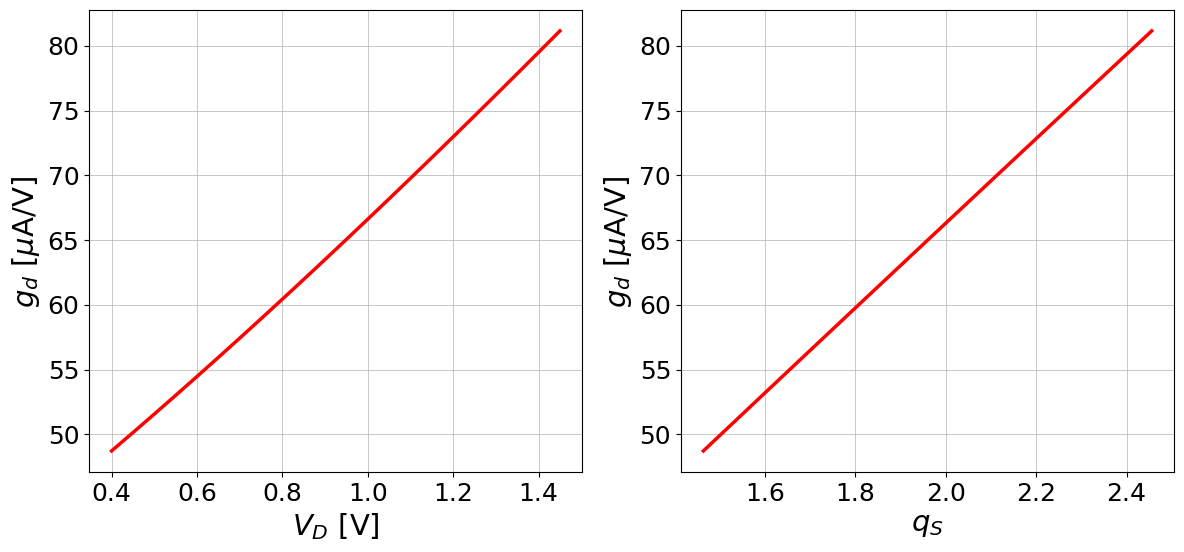

In [ ]:
#@title  gds vs VD & qS @ VG = 0.5 V

# Simulation input voltages
VD_ACM = np.arange(0.4, 1.5, 0.05)
numVD = len(VD_ACM)
VG_ACM= (np.zeros(numVD)+0.5)
VS_ACM = np.zeros(numVD)
VDS = VD_ACM - VS_ACM
VSD = -VDS
#VXB = np.minimum(VS,VD)
#VYB = np.maximum(VDS,VSD)

#Transistor Dimensions
W = 10e-6
L = 0.12e-6

#Model parameters
VT0 = 490e-3
IS = 11.78e-6
n = 1.43
sigma = 53e-3
zeta = 7e-3

#Technologic parameters
phit = 25.8e-3
tox = 3.98e-9
e0 = 8.85e-12
eox = 3.9
Cox = (eox*e0)/tox
mob = (IS*L)/(Cox*n*phit*phit*W*0.5) #mobility [m^2/V.s]
#vsat = (mob*phit)/(L*zeta)  #[m^2/s]
epsi = 0.01

#defined intern Variables
nums = len(VDS)
numeratorD = 0
denominatorD = 0
X = np.zeros(nums)
Z = 0
VP = np.zeros(nums)
WnD = 0
ZnD = 0
q1 = np.zeros(nums)
qsat = np.zeros(nums)
numd = len(VDS)
Y = np.zeros(numd)
q2 = np.zeros(numd)
qS = np.zeros(numd)
qD = np.zeros(numd)
nummeratorED = 0
denomiatorED = 0
EnD = 0
qn = 0

# Algorithm 443 to solve UCCM
def algo_443(Z):
  if Z < 0.7385:
      numeratorD = Z + (4.0/3.0)*Z*Z
      denominatorD = 1.0 + (7.0/3.0)*Z + (5.0/6.0)*Z*Z
      WnD = numeratorD / denominatorD
  else:
      numeratorD = np.log(Z)*np.log(Z) + 2.0*np.log(Z) - 3.0
      denominatorD = 7.0*np.log(Z)*np.log(Z) + 58.0*np.log(Z) + 127.0
      WnD = np.log(Z) - 24.0*(numeratorD / denominatorD)

  ZnD = np.log(Z) - WnD - np.log(WnD)
  TermD = ZnD / (1.0 + WnD)
  numeratorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - ZnD
  denominatorED = 2.0 * (1.0 + WnD) * (1.0 + WnD + (2.0/3.0) * ZnD) - 2 * ZnD
  EnD = TermD * (numeratorED / denominatorED)
  qn = WnD * (1 + EnD)
  return qn

for i in range(nums):

  VP[i] = (VG_ACM[i] - VT0 + sigma*(VD_ACM[i]+VS_ACM[i]))/n
#q1 from algorithm 443 and UCCM
  X[i] = np.exp(((VP[i] -VS_ACM[i])/phit)+1)
  q1[i] = algo_443(X[i])

#Calculating qdsat
  qsat[i] = q1[i] + 1 + (1/zeta) - np.sqrt(((1+(1/zeta))*(1+(1/zeta)))+((2*q1[i])/zeta))

#q2 from algorithm 443 and UCCM
  Y[i] = (((q1[i]-qsat[i]))*np.exp(-VDS[i]/(phit))*np.exp(q1[i]-qsat[i]))
  q2[i] = algo_443(Y[i]) +qsat[i]

#Normalized densities charges for a symmetric model
#if  VDS>0:
  qS = q1
  qD = q2
#else:
 # qD = q1
  #qS = q2
#####################Calculating Drain Current ID###############################

id_ACM = ((qD+qS+2)/(1+ np.sqrt((zeta*(qS-qD))*zeta*((qS-qD))+(epsi*epsi))))*(qS - qD)
ID_ACM = IS*id_ACM


###########################Calculating Transconductance#########################

#gdsat_ACM= 2*sigma*(IS/(n*phit))*((np.sqrt(1+id_ACM)-1)/(1+zeta*np.sqrt(1+id_ACM)))
gdsat= 2*sigma*(IS/(n*phit))*((qS)/(1+zeta*(1+qS)))


###############################Fig plots#########################################
fig, ax1 = plt.subplots(1,2,figsize=(14, 6))

#####Fig 1######
ax1[0].plot(VD_ACM,gdsat*(10**6),'r',linewidth=2.5,)
#Labels
ax1[0].set_ylabel('$g_d$ [$\mu $A/V] ',fontsize=21)
ax1[0].set_xlabel('$V_D$ [V]',fontsize=21)


# X and Y axis tick font size
for label in (ax1[0].get_xticklabels() + ax1[0].get_yticklabels()):
		label.set_fontsize(18)

#grid
ax1[0].grid(linewidth=0.5)
#ax1[0].legend(loc=4,fontsize=20)

#####Fig 2######
ax1[1].plot(qS,gdsat*(10**6),'r',linewidth=2.5,)
#Labels
ax1[1].set_ylabel('$g_d$ [$\mu $A/V] ',fontsize=21)
ax1[1].set_xlabel('$q_S$',fontsize=21)


# X and Y axis tick font size
for label in (ax1[1].get_xticklabels() + ax1[1].get_yticklabels()):
		label.set_fontsize(18)

#grid
ax1[1].grid(linewidth=0.5)
#ax1[1].legend(loc=4,fontsize=20)

---

# LNA Design Space with ACM2

---

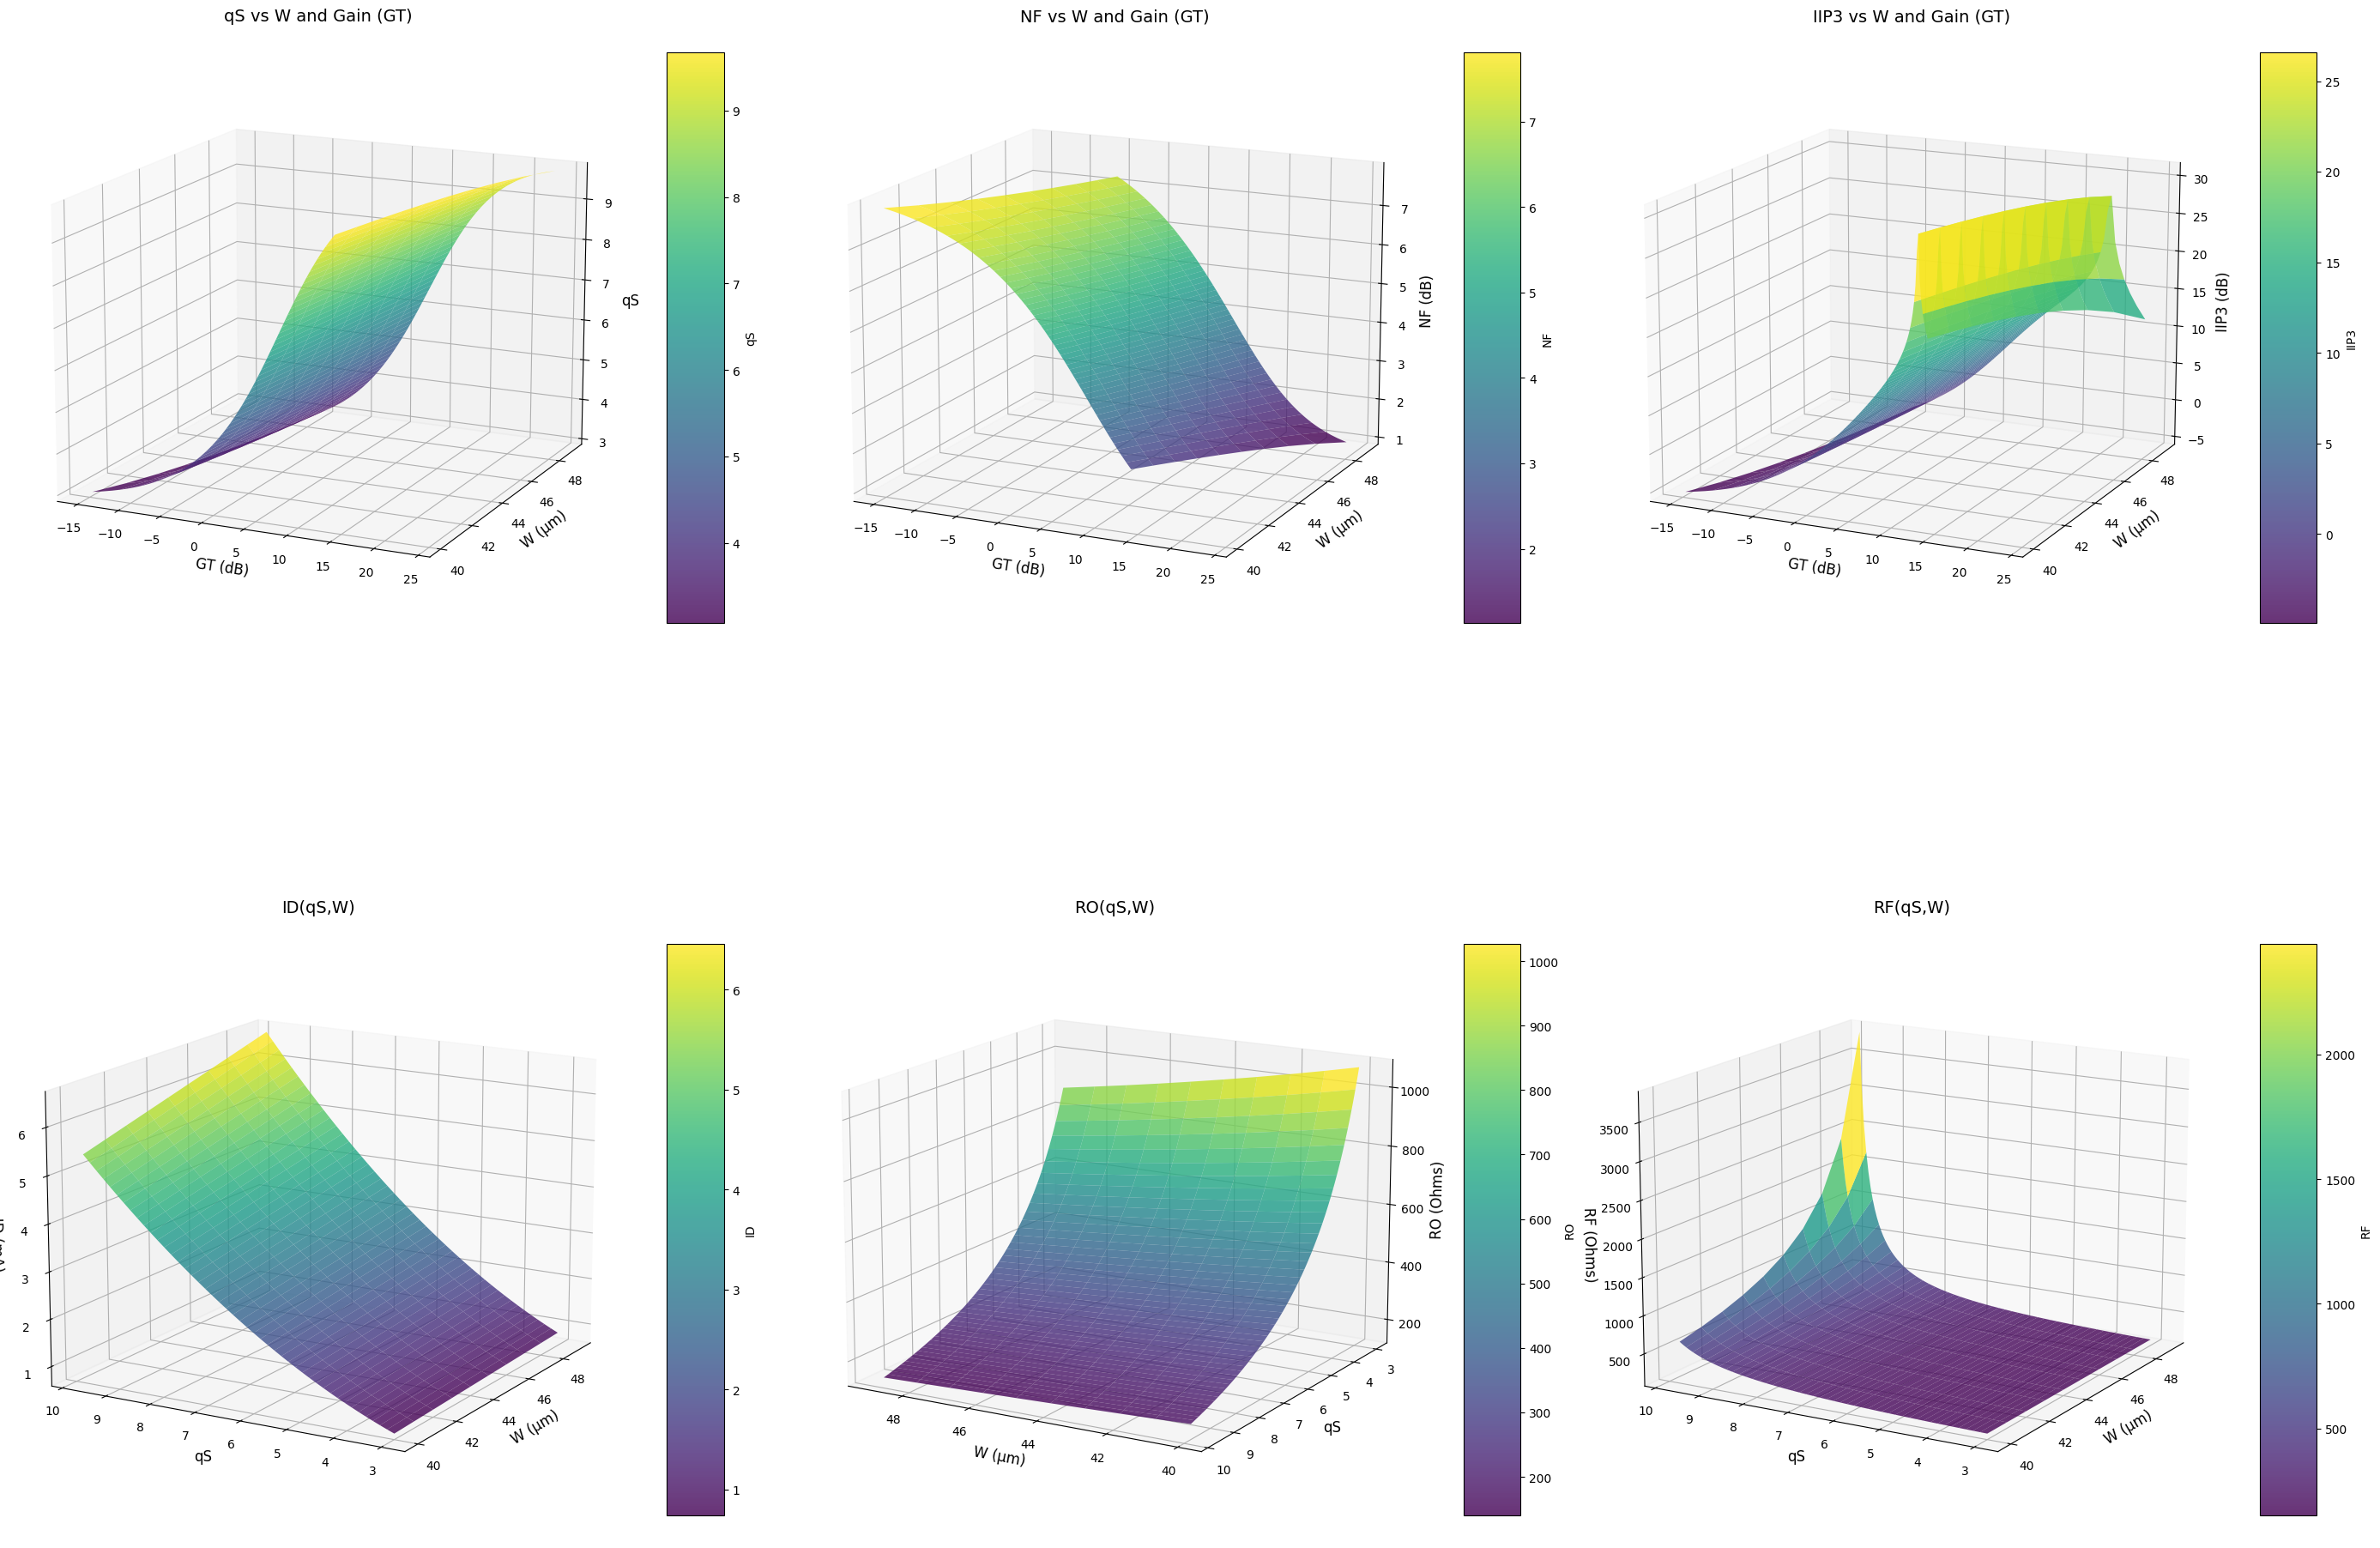

In [ ]:
#@title  V3 - RL(q,W) as a design variable - 3D plots

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

########## Input Variables - LNA ####################
fc = 6e9
N = 4
cL = 200e-15
VDD = 1.5  # core supply voltage of the technology in V
Rs = 50  # ohms <-- Series resistance
L = 0.12e-6  # transistor length
fo = fc / N
phit = 25.8e-3  # Thermal voltage

############## Input arrays ###################
qS_values = np.arange(3, 9.8, 0.05)  # qS array
W_values = np.arange(40e-6, 50e-6, 1e-6)  # W array in meters

# Model parameters
VT0 = 490e-3  # Threshold voltage
ISL = 1.178  # Specific current normalized by W = 10e-6
n = 1.43  # Slope factor
sigma = 53e-3  # DIBL
zeta = 7e-3  # Saturation velocity parameter


# Calculate i_f from qS
i_f = (qS_values + 1)**2 - 1
i_f = i_f[:, np.newaxis]  # Shape (181, 1)
# Calculate the drain current from if
ID = i_f*ISL*W_values  # ISL * W_values

# Calculate VDSsat based on the inversion level
VDSsat = phit * (np.sqrt(1 + i_f) + 3)

############## Plot VDSsat as a function of qS ##############
#plt.figure(figsize=(8, 6))
#plt.plot(qS_values, VDSsat)
#plt.xlabel('qS', fontsize=12)
#plt.ylabel('VDSsat (V)', fontsize=12)
#plt.title('VDSsat as a Function of qS', fontsize=14)
#plt.grid(True)
#plt.show()
#################### Load resistance ########################
RL = (VDD - VDSsat) / ID

########################## 3D PLOTS ################################
# Create subplots for 3D plots
fig = plt.figure(figsize=(28, 24))  # Double height to fit new plots
cmap = cm.viridis
# Existing plots
ax1 = fig.add_subplot(231, projection='3d')  # Change subplot number to accommodate new ones
ax2 = fig.add_subplot(232, projection='3d')
ax3 = fig.add_subplot(233, projection='3d')

# New plots for ID, RL, RO, RF
ax4 = fig.add_subplot(234, projection='3d')
ax5 = fig.add_subplot(235, projection='3d')
ax6 = fig.add_subplot(236, projection='3d')

# Meshgrid remains the same
W_mesh, qS_mesh = np.meshgrid(W_values, qS_values)

# Calculate transconductance gm
gm = 2 * ((ISL * W_mesh) / (n * phit)) * (qS_mesh / (1 + zeta * (1 + qS_mesh)))
gmsat3 = 16 * ((ISL * W_mesh) / (n * phit)**3) * (qS_mesh / ((qS_mesh + 1)**3))*((2 - (2 * zeta * qS_mesh) - (3 * zeta * qS_mesh**2)) / ((zeta * qS_mesh + 2)**4))

# Calculate rds and RO
gds = sigma * gm
rds = 1 / gds
RO = (RL * rds) / (RL + rds)

# Calculate RF and k
ROmin = 1 / (2 * np.pi * cL * N * fo)
RF = 1 / (2 * np.pi * cL * N * fo - 1 / RO)
k = gm * RF
k = np.where(k > 1, k, np.nan)  # Exclude values where k <= 1

# Calculate voltage gain Gv
QIN = np.sqrt((RO + RF) / (Rs * (1 + gm * RO)))
Gv = ((k - 1) * RO) / (RO + RF)
GT = Gv * QIN
GT_dB = 20 * np.log10(np.abs(GT))  # Convert gain to dB

# Calculate IIP3 and IIP3_dB
IIP3 = (2/QIN) * (np.sqrt(abs((2.0 *  gm ) / (gmsat3))))
IIP3_dB = 20 * np.log10(np.abs(IIP3))

###################### Noise Calculation ##########################
gamma = 0.8
frac1 = 4 * (((RF) / (QIN * QIN)) + Rs) * (((RF) / (QIN * QIN)) + Rs)
frac2 = QIN * QIN * gm * Rs * ((((RF) / (QIN * QIN)) + Rs + ((gm * Rs * RF * RL) / (RF + RL)))) * ((((RF) / (QIN * QIN)) + Rs + ((gm * Rs * RF * RL) / (RF + RL))))
frac3 = (1 + ((QIN * QIN * gm * Rs * RF) / (RF + QIN * QIN * Rs))) * (1 + ((QIN * QIN * gm * Rs * RF) / (RF + QIN * QIN * Rs)))

F = 1 + (frac1 / frac2) * (gamma + (1 / (gm * RL)) + frac3 / (gm * RF))
NF = 10 * np.log10(F)

# Plot qS
surf1 = ax1.plot_surface(GT_dB, W_mesh * 1e6, qS_mesh, cmap=cmap, alpha=0.8)

# Plot NF
surf2 = ax2.plot_surface(GT_dB, W_mesh * 1e6, NF, cmap=cmap, alpha=0.8)

# Plot IIP3
surf3 = ax3.plot_surface(GT_dB, W_mesh * 1e6, IIP3_dB, cmap=cmap, alpha=0.8)

# Customize the first subplot for qS
ax1.set_xlabel('GT (dB)', fontsize=12)
ax1.set_ylabel('W (μm)', fontsize=12)
ax1.set_zlabel('qS', fontsize=12)
ax1.set_title('qS vs W and Gain (GT)', fontsize=14)
ax1.view_init(elev=15, azim=295)  # Adjust elevation and azimuth
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10, label='qS')

# Customize the second subplot for NF
ax2.set_xlabel('GT (dB)', fontsize=12)
ax2.set_ylabel('W (μm)', fontsize=12)
ax2.set_zlabel('NF (dB)', fontsize=12)
ax2.set_title('NF vs W and Gain (GT)', fontsize=14)
ax2.view_init(elev=15, azim=295)  # Adjust elevation and azimuth
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10, label='NF')

# Customize the third subplot for IIP3
ax3.set_xlabel('GT (dB)', fontsize=12)
ax3.set_ylabel('W (μm)', fontsize=12)
ax3.set_zlabel('IIP3 (dB)', fontsize=12)
ax3.set_title('IIP3 vs W and Gain (GT)', fontsize=14)
ax3.view_init(elev=15, azim=295)  # Adjust elevation and azimuth
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=10, label='IIP3')

# Plot for ID
surf4 = ax4.plot_surface(W_mesh * 1e6, qS_mesh, ID*1e3, cmap=cmap, alpha=0.8)
ax4.set_xlabel('W (μm)', fontsize=12)
ax4.set_ylabel('qS', fontsize=12)
ax4.set_zlabel('ID (mA)', fontsize=12)
ax4.set_title('ID(qS,W)', fontsize=14)
ax4.view_init(elev=15, azim=210)
fig.colorbar(surf4, ax=ax4, shrink=0.5, aspect=10, label='ID')

# Plot for RL
surf5 = ax5.plot_surface(W_mesh * 1e6, qS_mesh, RO, cmap=cmap, alpha=0.8)
ax5.set_xlabel('W (μm)', fontsize=12)
ax5.set_ylabel('qS', fontsize=12)
ax5.set_zlabel('RO (Ohms)', fontsize=12)
ax5.set_title('RO(qS,W)', fontsize=14)
ax5.view_init(elev=15, azim=120)
fig.colorbar(surf5, ax=ax5, shrink=0.5, aspect=10, label='RO')

# Plot for RF
surf6 = ax6.plot_surface(W_mesh * 1e6, qS_mesh, RF, cmap=cmap, alpha=0.8)
ax6.set_xlabel('W (μm)', fontsize=12)
ax6.set_ylabel('qS', fontsize=12)
ax6.set_zlabel('RF (Ohms)', fontsize=12)
ax6.set_title('RF(qS,W)', fontsize=14)
ax6.view_init(elev=15, azim=210)
fig.colorbar(surf6, ax=ax6, shrink=0.5, aspect=10, label='RF')

plt.tight_layout()
plt.show()



<ipython-input-1-6d3df12771e4>:61: RuntimeWarning: invalid value encountered in sqrt
  QIN = np.sqrt((RO + RF) / (Rs * (1 + gm * RO)))


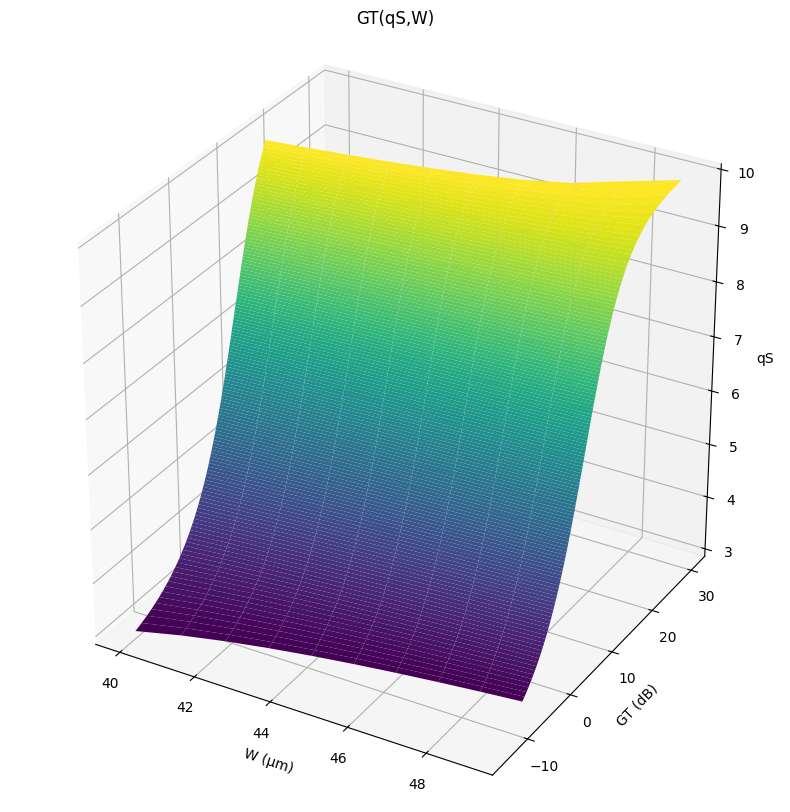

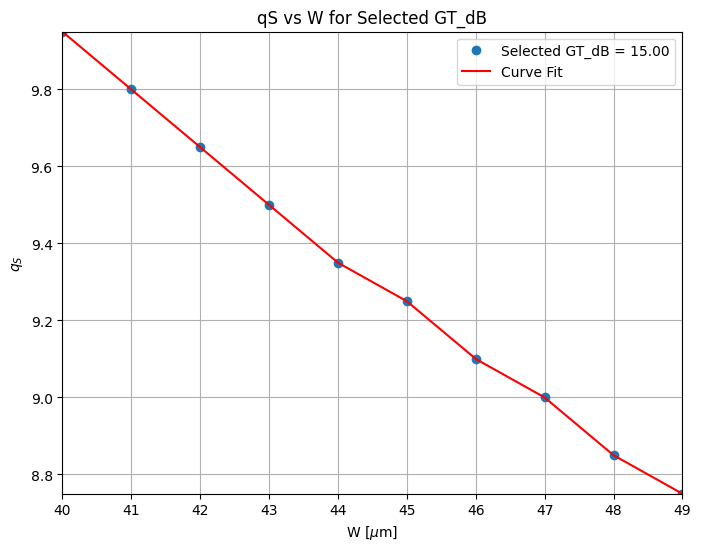

In [ ]:
#@title Choose GT to see the qs(W)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.interpolate import interp1d


########## Input Variables - LNA ####################
fc = 6e9
N = 4
cL = 200e-15
VDD = 1.5  # core supply voltage of the technology in V
Rs = 50  # ohms <-- Series resistance
L = 0.12e-6  # transistor length
fo = fc / N
phit = 25.8e-3  # Thermal voltage

############## Input arrays ###################
qS_values = np.arange(3, 10, 0.05)  # qS array
W_values = np.arange(40e-6, 50e-6, 1e-6)  # W array in meters

# Model parameters
VT0 = 490e-3  # Threshold voltage
ISL = 1.178  # Specific current normalized by W = 10e-6
n = 1.43  # Slope factor
sigma = 53e-3  # DIBL
zeta = 7e-3  # Saturation velocity parameter


# Calculate i_f from qS
i_f = (qS_values + 1)**2 - 1
i_f = i_f[:, np.newaxis]  # Shape (181, 1)
# Calculate the drain current from if
ID = i_f*ISL*W_values  # ISL * W_values

# Calculate VDSsat based on the inversion level
VDSsat = phit * (np.sqrt(1 + i_f) + 3)

#################### Load resistance ########################
RL = (VDD - VDSsat) / ID

W_mesh, qS_mesh = np.meshgrid(W_values, qS_values)

# Create meshgrid for W and qS for plotting
W_2D, qS_2D = np.meshgrid(W_values * 1e6, qS_values)  # W in micrometers

# Calculate transconductance gm
gm = 2 * ((ISL * W_mesh) / (n * phit)) * (qS_mesh / (1 + zeta * (1 + qS_mesh)))

# Calculate rds and RO
gds = sigma * gm
rds = np.where(gds != 0, 1 / gds, np.nan)  # Avoid division by zero
RO = np.where(rds != np.nan, (RL * rds) / (RL + rds), np.nan)

# Calculate RF
ROmin = 1 / (2 * np.pi * cL * N * fo)
RF = np.where(RO != 0, 1 / (2 * np.pi * cL * N * fo - 1 / RO), np.nan)

# Calculate voltage gain Gv
QIN = np.sqrt((RO + RF) / (Rs * (1 + gm * RO)))
Gv = ((gm * RF - 1) * RO) / (RO + RF)
GT = Gv * QIN

# Avoid log of zero or negative values
GT = np.where(GT > 0, GT, np.nan)
GT_dB = np.where(GT > 0, 20 * np.log10(np.abs(GT)), np.nan)

# Plot the results
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(W_2D, GT_dB, qS_2D, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

# Labels
ax.set_title(f'GT(qS,W)')
ax.set_xlabel('W (μm)')
ax.set_ylabel('GT (dB)')
ax.set_zlabel('qS')
ax.set_box_aspect([1, 1, 1])
plt.show()

# Ask the user to choose a value of GT_dB
selected_GT_dB = 15

# Flatten the arrays and create a DataFrame with matching lengths
W_flat = W_2D.flatten()
qS_flat = qS_2D.flatten()
GT_dB_flat = GT_dB.flatten()

# Create a DataFrame for qS, W, and GT_dB
data = {
    'qS': qS_flat,
    'W (micrometers)': W_flat,
    'GT_dB': GT_dB_flat
}
df = pd.DataFrame(data)

# Print the range of GT_dB values for debugging
#print(f"RL = {RL} Ohms: GT_dB range = [{GT_dB_flat.min()}, {GT_dB_flat.max()}]")

# Validate and find corresponding qS and W
tolerance = 1e-1
if selected_GT_dB < GT_dB_flat.min() or selected_GT_dB > GT_dB_flat.max():
    print(f"GT_dB must be between {GT_dB_flat.min():.4g} and {GT_dB_flat.max():.4g} dB.")
else:
    # Find rows where GT_dB matches the selected value
    matching_rows = df[np.isclose(df['GT_dB'], selected_GT_dB, atol=tolerance)]

    # Compute mean qS for each W value
    if not matching_rows.empty:
        mean_qS = matching_rows.groupby('W (micrometers)')['qS'].mean().reset_index()

        # Interpolation to create a smooth curve
        sorted_data = mean_qS.sort_values('W (micrometers)')
        f = interp1d(sorted_data['W (micrometers)'], sorted_data['qS'], kind='linear', fill_value="extrapolate")
        W_smooth = np.linspace(sorted_data['W (micrometers)'].min(), sorted_data['W (micrometers)'].max(), 500)
        qS_smooth = f(W_smooth)

        plt.figure(figsize=(8, 6))

        plt.plot(sorted_data['W (micrometers)'], sorted_data['qS'], 'o', label=f'Selected GT_dB = {selected_GT_dB:.2f}')
        plt.plot(W_smooth, qS_smooth, '-', color='red', label='Curve Fit')
        plt.xlabel('W [$\mu$m]')
        plt.ylabel('$q_S$')
        plt.title('qS vs W for Selected GT_dB')
        plt.grid(True)
        plt.legend()

        # Safeguard against NaN or Inf values in axis limits
        W_smooth = W_smooth[np.isfinite(W_smooth)]
        qS_smooth = qS_smooth[np.isfinite(qS_smooth)]

        plt.xlim(W_smooth.min(), W_smooth.max())
        plt.ylim(qS_smooth.min(), qS_smooth.max())

        plt.show()
    else:
        print(f"No matching rows found for GT_dB = {selected_GT_dB:.2f} dB.")

<ipython-input-20-26e2ee8766db>:61: RuntimeWarning: invalid value encountered in sqrt
  QIN = np.sqrt((RO + RF) / (Rs * (1 + gm * RO)))


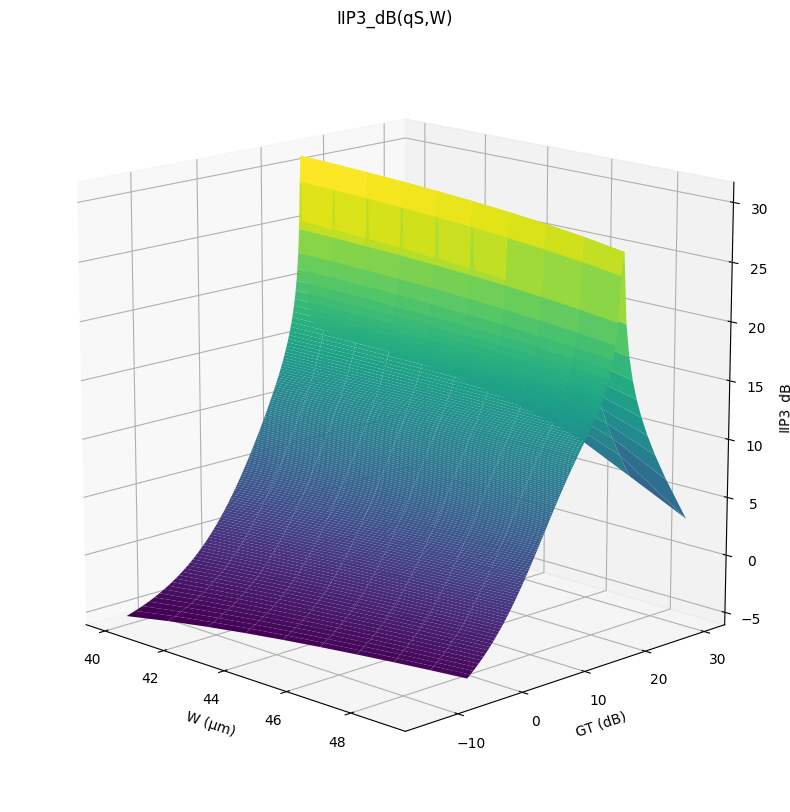

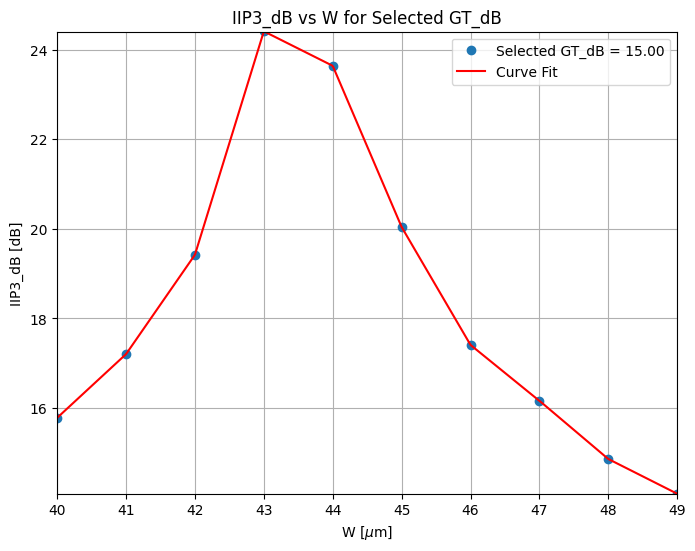

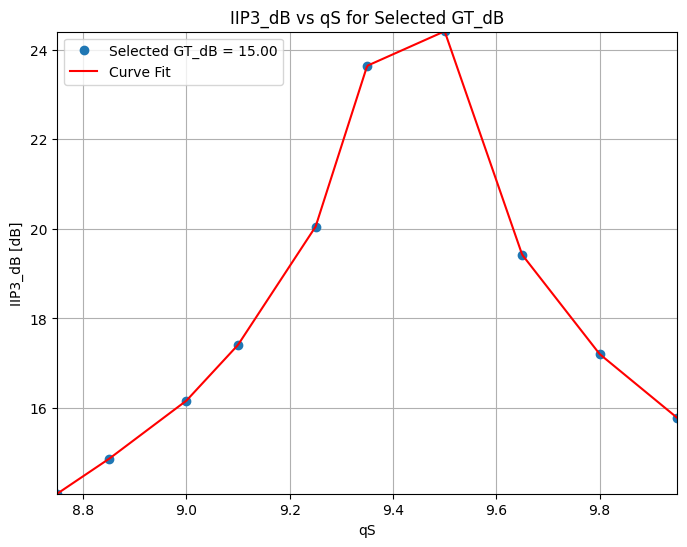

In [ ]:
#@title Choose GT to see the IIP3_dB(W)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.interpolate import interp1d


########## Input Variables - LNA ####################
fc = 6e9
N = 4
cL = 200e-15
VDD = 1.5  # core supply voltage of the technology in V
Rs = 50  # ohms <-- Series resistance
L = 0.12e-6  # transistor length
fo = fc / N
phit = 25.8e-3  # Thermal voltage

############## Input arrays ###################
qS_values = np.arange(3, 10, 0.05)  # qS array
W_values = np.arange(40e-6, 50e-6, 1e-6)  # W array in meters

# Model parameters
VT0 = 490e-3  # Threshold voltage
ISL = 1.178  # Specific current normalized by W = 10e-6
n = 1.43  # Slope factor
sigma = 53e-3  # DIBL
zeta = 7e-3  # Saturation velocity parameter


# Calculate i_f from qS
i_f = (qS_values + 1)**2 - 1
i_f = i_f[:, np.newaxis]  # Shape (181, 1)
# Calculate the drain current from if
ID = i_f*ISL*W_values  # ISL * W_values

# Calculate VDSsat based on the inversion level
VDSsat = phit * (np.sqrt(1 + i_f) + 3)

#################### Load resistance ########################
RL = (VDD - VDSsat) / ID

W_mesh, qS_mesh = np.meshgrid(W_values, qS_values)

# Create meshgrid for W and qS for plotting
W_2D, qS_2D = np.meshgrid(W_values * 1e6, qS_values)  # W in micrometers

# Calculate transconductance gm and gmsat3
gm = 2 * ((ISL * W_mesh) / (n * phit)) * (qS_mesh / (1 + zeta * (1 + qS_mesh)))
gmsat3 = 16 * ((ISL * W_mesh) / (n * phit)**3) * (qS_mesh / ((qS_mesh + 1)**3))*((2 - (2 * zeta * qS_mesh) - (3 * zeta * qS_mesh**2)) / ((zeta * qS_mesh + 2)**4))
# Calculate rds and RO
gds = sigma * gm
rds = np.where(gds != 0, 1 / gds, np.nan)  # Avoid division by zero
RO = np.where(rds != np.nan, (RL * rds) / (RL + rds), np.nan)

# Calculate RF
ROmin = 1 / (2 * np.pi * cL * N * fo)
RF = np.where(RO != 0, 1 / (2 * np.pi * cL * N * fo - 1 / RO), np.nan)

# Calculate voltage gain Gv
QIN = np.sqrt((RO + RF) / (Rs * (1 + gm * RO)))
Gv = ((gm * RF - 1) * RO) / (RO + RF)
GT = Gv * QIN

# Avoid log of zero or negative values
GT = np.where(GT > 0, GT, np.nan)
GT_dB = np.where(GT > 0, 20 * np.log10(np.abs(GT)), np.nan)

# Calculate IIP3 and IIP3_dB
IIP3 = (2/QIN) * (np.sqrt(abs((2.0 *  gm ) / (gmsat3))))
IIP3_dB = 20 * np.log10(np.abs(IIP3))

# Plot the results
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(W_2D, GT_dB, IIP3_dB, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

# Labels
ax.set_title(f'IIP3_dB(qS,W)')
ax.set_xlabel('W (μm)')
ax.set_ylabel('GT (dB)')
ax.set_zlabel('IIP3_dB')
ax.set_box_aspect([1, 1, 1])
ax.view_init(elev=15, azim=315)  # Adjust elevation and azimuth
plt.show()

# Ask the user to choose a value of GT_dB
selected_GT_dB = 15

# Flatten the arrays and create a DataFrame with matching lengths
W_flat = W_2D.flatten()
qS_flat = qS_2D.flatten()
GT_dB_flat = GT_dB.flatten()
IIP3_dB_flat = IIP3_dB.flatten()  # Flatten IIP3_dB for DataFrame

# Create a DataFrame for qS, W, GT_dB, and IIP3_dB
data = {
    'qS': qS_flat,
    'W (micrometers)': W_flat,
    'GT_dB': GT_dB_flat,
    'IIP3_dB': IIP3_dB_flat
}
df = pd.DataFrame(data)

# Print the range of GT_dB values for debugging
#print(f"RL = {RL} Ohms: GT_dB range = [{GT_dB_flat.min()}, {GT_dB_flat.max()}]")

# Validate and find corresponding W and IIP3_dB
tolerance = 1e-1
if selected_GT_dB < GT_dB_flat.min() or selected_GT_dB > GT_dB_flat.max():
    print(f"GT_dB must be between {GT_dB_flat.min():.4g} and {GT_dB_flat.max():.4g} dB.")
else:
    # Find rows where GT_dB matches the selected value
    matching_rows = df[np.isclose(df['GT_dB'], selected_GT_dB, atol=tolerance)]

    # Compute mean IIP3_dB for each W value
    if not matching_rows.empty:
        mean_IIP3_dB = matching_rows.groupby('W (micrometers)')['IIP3_dB'].mean().reset_index()

        # Interpolation to create a smooth curve for IIP3_dB vs W
        sorted_data = mean_IIP3_dB.sort_values('W (micrometers)')
        f = interp1d(sorted_data['W (micrometers)'], sorted_data['IIP3_dB'], kind='linear', fill_value="extrapolate")
        W_smooth = np.linspace(sorted_data['W (micrometers)'].min(), sorted_data['W (micrometers)'].max(), 500)
        IIP3_smooth = f(W_smooth)

        plt.figure(figsize=(8, 6))

        plt.plot(sorted_data['W (micrometers)'], sorted_data['IIP3_dB'], 'o', label=f'Selected GT_dB = {selected_GT_dB:.2f}')
        plt.plot(W_smooth, IIP3_smooth, '-', color='red', label='Curve Fit')
        plt.xlabel('W [$\mu$m]')
        plt.ylabel('IIP3_dB [dB]')
        plt.title('IIP3_dB vs W for Selected GT_dB')
        plt.grid(True)
        plt.legend()

        # Safeguard against NaN or Inf values in axis limits
        W_smooth = W_smooth[np.isfinite(W_smooth)]
        IIP3_smooth = IIP3_smooth[np.isfinite(IIP3_smooth)]

        plt.xlim(W_smooth.min(), W_smooth.max())
        plt.ylim(IIP3_smooth.min(), IIP3_smooth.max())

        plt.show()

        # Plot IIP3_dB vs qS for the selected GT_dB
        mean_IIP3_dB_qS = matching_rows.groupby('qS')['IIP3_dB'].mean().reset_index()

        # Interpolation to create a smooth curve for IIP3_dB vs qS
        sorted_data_qS = mean_IIP3_dB_qS.sort_values('qS')
        f_qS = interp1d(sorted_data_qS['qS'], sorted_data_qS['IIP3_dB'], kind='linear', fill_value="extrapolate")
        qS_smooth = np.linspace(sorted_data_qS['qS'].min(), sorted_data_qS['qS'].max(), 500)
        IIP3_smooth_qS = f_qS(qS_smooth)

        plt.figure(figsize=(8, 6))

        plt.plot(sorted_data_qS['qS'], sorted_data_qS['IIP3_dB'], 'o', label=f'Selected GT_dB = {selected_GT_dB:.2f}')
        plt.plot(qS_smooth, IIP3_smooth_qS, '-', color='red', label='Curve Fit')
        plt.xlabel('qS')
        plt.ylabel('IIP3_dB [dB]')
        plt.title('IIP3_dB vs qS for Selected GT_dB')
        plt.grid(True)
        plt.legend()

        # Safeguard against NaN or Inf values in axis limits
        qS_smooth = qS_smooth[np.isfinite(qS_smooth)]
        IIP3_smooth_qS = IIP3_smooth_qS[np.isfinite(IIP3_smooth_qS)]

        plt.xlim(qS_smooth.min(), qS_smooth.max())
        plt.ylim(IIP3_smooth_qS.min(), IIP3_smooth_qS.max())

        plt.show()
    else:
        print(f"No matching rows found for GT_dB = {selected_GT_dB:.2f} dB.")

<ipython-input-23-b93ec28a9729>:61: RuntimeWarning: invalid value encountered in sqrt
  QIN = np.sqrt((RO + RF) / (Rs * (1 + gm * RO)))


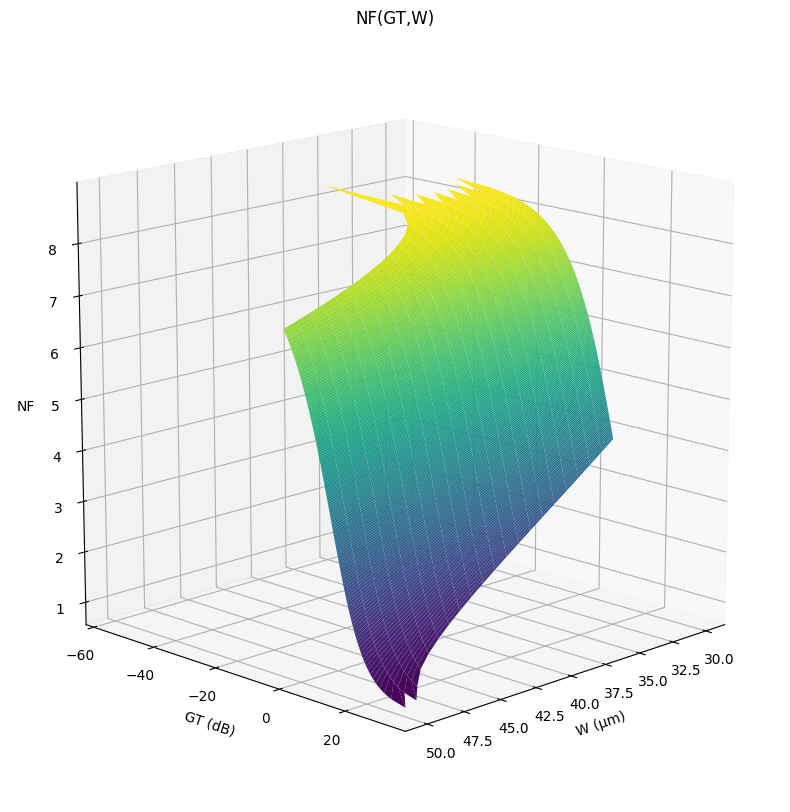

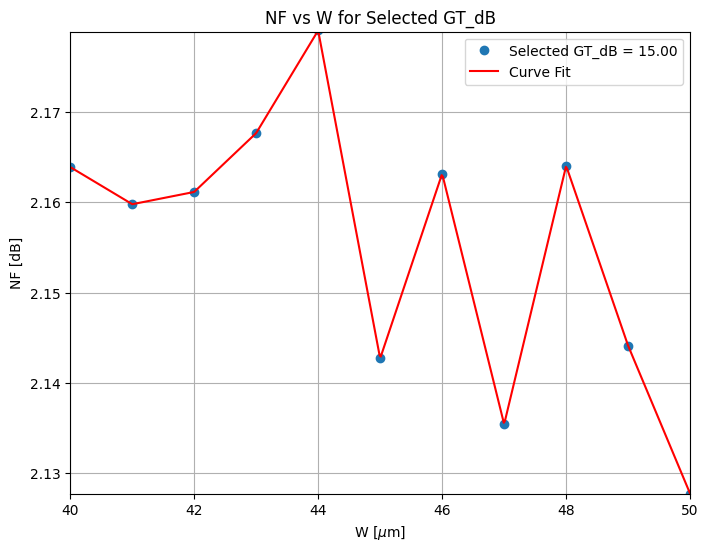

In [ ]:
#@title Choose GT to see the NF(W) and NF(qs)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.interpolate import interp1d


########## Input Variables - LNA ####################
fc = 6e9
N = 4
cL = 200e-15
VDD = 1.5  # core supply voltage of the technology in V
Rs = 50  # ohms <-- Series resistance
L = 0.12e-6  # transistor length
fo = fc / N
phit = 25.8e-3  # Thermal voltage

############## Input arrays ###################
qS_values = np.arange(3, 10, 0.05)  # qS array
W_values = np.arange(30e-6, 50e-6, 1e-6)  # W array in meters

# Model parameters
VT0 = 490e-3  # Threshold voltage
ISL = 1.178  # Specific current normalized by W = 10e-6
n = 1.43  # Slope factor
sigma = 53e-3  # DIBL
zeta = 7e-3  # Saturation velocity parameter


# Calculate i_f from qS
i_f = (qS_values + 1)**2 - 1
i_f = i_f[:, np.newaxis]  # Shape (181, 1)
# Calculate the drain current from if
ID = i_f*ISL*W_values  # ISL * W_values

# Calculate VDSsat based on the inversion level
VDSsat = phit * (np.sqrt(1 + i_f) + 3)

#################### Load resistance ########################
RL = (VDD - VDSsat) / ID

W_mesh, qS_mesh = np.meshgrid(W_values, qS_values)

# Create meshgrid for W and qS for plotting
W_2D, qS_2D = np.meshgrid(W_values * 1e6, qS_values)  # W in micrometers

# Calculate transconductance gm and gmsat3
gm = 2 * ((ISL * W_mesh) / (n * phit)) * (qS_mesh / (1 + zeta * (1 + qS_mesh)))
gmsat3 = 16 * ((ISL * W_mesh) / (n * phit)**3) * (qS_mesh / ((qS_mesh + 1)**3))*((2 - (2 * zeta * qS_mesh) - (3 * zeta * qS_mesh**2)) / ((zeta * qS_mesh + 2)**4))
# Calculate rds and RO
gds = sigma * gm
rds = np.where(gds != 0, 1 / gds, np.nan)  # Avoid division by zero
RO = np.where(rds != np.nan, (RL * rds) / (RL + rds), np.nan)

# Calculate RF
ROmin = 1 / (2 * np.pi * cL * N * fo)
RF = np.where(RO != 0, 1 / (2 * np.pi * cL * N * fo - 1 / RO), np.nan)

# Calculate voltage gain Gv
QIN = np.sqrt((RO + RF) / (Rs * (1 + gm * RO)))
Gv = ((gm * RF - 1) * RO) / (RO + RF)
GT = Gv * QIN

# Avoid log of zero or negative values
GT = np.where(GT > 0, GT, np.nan)
GT_dB = np.where(GT > 0, 20 * np.log10(np.abs(GT)), np.nan)

# Calculate IIP3 and IIP3_dB
IIP3 = (2/QIN) * (np.sqrt(abs((2.0 *  gm ) / (gmsat3))))
IIP3_dB = 20 * np.log10(np.abs(IIP3))

###################### Noise Calculation ##########################
gamma = 0.8
frac1 = 4 * (((RF) / (QIN * QIN)) + Rs) * (((RF) / (QIN * QIN)) + Rs)
frac2 = QIN * QIN * gm * Rs * ((((RF) / (QIN * QIN)) + Rs + ((gm * Rs * RF * RL) / (RF + RL)))) * ((((RF) / (QIN * QIN)) + Rs + ((gm * Rs * RF * RL) / (RF + RL))))
frac3 = (1 + ((QIN * QIN * gm * Rs * RF) / (RF + QIN * QIN * Rs))) * (1 + ((QIN * QIN * gm * Rs * RF) / (RF + QIN * QIN * Rs)))

F = 1 + (frac1 / frac2) * (gamma + (1 / (gm * RL)) + frac3 / (gm * RF))
NF = 10 * np.log10(F)

# Plot the results
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(W_2D, GT_dB, NF, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

# Labels
ax.set_title(f'NF(GT,W)')
ax.set_xlabel('W (μm)')
ax.set_ylabel('GT (dB)')
ax.set_zlabel('NF')
ax.set_box_aspect([1, 1, 1])
ax.view_init(elev=15, azim=45)  # Adjust elevation and azimuth
plt.show()

# Ask the user to choose a value of GT_dB
selected_GT_dB = 15

# Flatten the arrays and create a DataFrame with matching lengths
W_flat = W_2D.flatten()
qS_flat = qS_2D.flatten()
GT_dB_flat = GT_dB.flatten()
NF_flat = NF.flatten()  # Flatten NF for DataFrame

# Create a DataFrame for qS, W, GT_dB, and NF
data = {
    'qS': qS_flat,
    'W (micrometers)': W_flat,
    'GT_dB': GT_dB_flat,
    'NF (dB)': NF_flat
}
df = pd.DataFrame(data)

# Print the range of GT_dB values for debugging
#print(f"RL = {RL} Ohms: GT_dB range = [{GT_dB_flat.min()}, {GT_dB_flat.max()}]")

# Validate and find corresponding W and NF
tolerance = 1e-1
if selected_GT_dB < GT_dB_flat.min() or selected_GT_dB > GT_dB_flat.max():
    print(f"GT_dB must be between {GT_dB_flat.min():.4g} and {GT_dB_flat.max():.4g} dB.")
else:
    # Find rows where GT_dB matches the selected value
    matching_rows = df[np.isclose(df['GT_dB'], selected_GT_dB, atol=tolerance)]

    # Compute mean NF for each W value
    if not matching_rows.empty:
        mean_NF = matching_rows.groupby('W (micrometers)')['NF (dB)'].mean().reset_index()

        # Interpolation to create a smooth curve for NF vs W
        sorted_data = mean_NF.sort_values('W (micrometers)')
        f = interp1d(sorted_data['W (micrometers)'], sorted_data['NF (dB)'], kind='linear', fill_value="extrapolate")
        W_smooth = np.linspace(sorted_data['W (micrometers)'].min(), sorted_data['W (micrometers)'].max(), 500)
        NF_smooth = f(W_smooth)

        plt.figure(figsize=(8, 6))

        plt.plot(sorted_data['W (micrometers)'], sorted_data['NF (dB)'], 'o', label=f'Selected GT_dB = {selected_GT_dB:.2f}')
        plt.plot(W_smooth, NF_smooth, '-', color='red', label='Curve Fit')
        plt.xlabel('W [$\mu$m]')
        plt.ylabel('NF [dB]')
        plt.title('NF vs W for Selected GT_dB')
        plt.grid(True)
        plt.legend()

        # Safeguard against NaN or Inf values in axis limits
        W_smooth = W_smooth[np.isfinite(W_smooth)]
        NF_smooth = NF_smooth[np.isfinite(NF_smooth)]

        plt.xlim(W_smooth.min(), W_smooth.max())
        plt.ylim(NF_smooth.min(), NF_smooth.max())

        plt.show()
    else:
        print(f"No matching rows found for GT_dB = {selected_GT_dB:.2f} dB.")

In [ ]:
#@title calculates GT_dB, IIP3 and NF with a chosen qS and W

import numpy as np

# Constants

W = float(input("Enter the Width in meters: "))
qS = float(input("Enter the value of qs: "))

########## Input Variables - LNA ####################
fc = 6e9
N = 4
cL = 200e-15
VDD = 1.5  # core supply voltage of the technology in V
Rs = 50  # ohms <-- Series resistance
L = 0.12e-6  # transistor length
fo = fc / N
phit = 25.8e-3  # Thermal voltage

# Model parameters
VT0 = 490e-3  # Threshold voltage
ISL = 1.178  # Specific current normalized by W = 10e-6
n = 1.43  # Slope factor
sigma = 53e-3  # DIBL
zeta = 7e-3  # Saturation velocity parameter


# Calculate i_f from qS
i_f = (qS + 1)**2 - 1
# Calculate the drain current from if
ID = i_f*ISL*W  # ISL * W_values

# Calculate VDSsat based on the inversion level
VDSsat = phit * (np.sqrt(1 + i_f) + 3)

#################### Load resistance ########################
RL = (VDD - VDSsat) / ID

# Calculate gm
gm = 2 * ((ISL * W) / (n * phit)) * (qS / (1 + zeta * (1 + qS)))

# Calculate gds and rds
gds = sigma * gm
rds = 1 / gds

# Calculate RO
RO = (RL * rds) / (RL + rds)

# Calculate RF
fo = fc / N
RF = 1 / (2 * np.pi * cL * N * fo - 1 / RO)

# Calculate QIN
QIN = np.sqrt((RO + RF) / (Rs * (1 + gm * RO)))

# Calculate Gv
Gv = ((gm * RF - 1) * RO) / (RO + RF)

# Calculate GT
GT = Gv * QIN
GT_dB = 20 * np.log10(np.abs(GT))

# Calculate IIP3
gmsat3 = 16 * ((ISL * W) / (n * phit)**3) * (qS / ((qS + 1)**3)) * ((2 - (2 * zeta * qS) - (3 * zeta * qS**2)) / ((zeta * qS + 2)**4))
IIP3 = (2 / QIN) * (np.sqrt(np.abs((2.0 * gm) / (gmsat3))))
IIP3_dB = 20 * np.log10(np.abs(IIP3))

# Calculate NF
gamma = 0.8
frac1 = 4 * (((RF) / (QIN * QIN)) + Rs)**2
frac2 = QIN**2 * gm * Rs * (((RF) / (QIN * QIN)) + Rs + (gm * Rs * RF * RL) / (RF + RL))**2
frac3 = (1 + (QIN**2 * gm * Rs * RF) / (RF + QIN**2 * Rs))**2
F = 1 + (frac1 / frac2) * (gamma + (1 / (gm * RL)) + frac3 / (gm * RF))
NF = 10 * np.log10(F)

#Calculate VG

VG = VT0+ n*phit*(qS - 1 +np.log(qS))

i_f = (qS +1)**2 -1
IDC = i_f*ISL*W

# input match
RP  = (RO+RF)/(1+gm*RO)
QP = np.sqrt((QIN**2) - 1)
RIN = RP/(1+QP**2)
CP = (RO**2)*cL*((gm*RF)-1)/((RO+RF)**2)
#RP = Rs*(1+QP**2)
#RIN = (RO + RF) / ((1 + gm * RO) * (1 + QP))
Cgs = (QP / (RP * 2 * np.pi * fo)) - CP
Lg = (1 / (2 * np.pi * fo)) * (QP**2) / ((1 + QP**2) * Cgs * 2 * np.pi * fo)
# Output results
print("\n" + "="*50)
print(f"RL: {RL} ohms")
print(f"RF: {RF} ohms")
print("\n" + "="*50)
print(f"RO: {RO} ohms")
print("\n" + "="*50)
print(f"GT_dB: {GT_dB} dB")
print(f"IIP3_dB: {IIP3_dB} dB")
print(f"NF: {NF} dB")
print("\n" + "="*50)
print(f"VG: {VG} V")
print(f"VDSsat: {VDSsat} V")
print("\n" + "="*50)
print(f"Ibias: {IDC*1e3} mA")
print("\n" + "="*50)

print("\n" + "="*50)
print(f"QIN = {QIN:.3f}:")
print(f"RIN = {RIN:.3f} ohms")
print("\n" + "="*50)
print(f"QP = {QP:.3f}")
print(f"RP = {RP:.3f} ohms")
print("\n" + "="*50)
print(f"Cgs = {Cgs:.3e} F")
print(f"Lg = {Lg:.3e} H")
print("="*50)


Enter the Width in meters: 43e-6
Enter the value of qs: 9.4

RL: 212.64967329237268 ohms
RF: 640.1770173210559 ohms

RO: 167.2868990072015 ohms

GT_dB: 14.565886578855663 dB
IIP3_dB: 27.99258254740886 dB
NF: 2.271156376560489 dB

VG: 0.8825783432761471 V
VDSsat: 0.34572 V

Ibias: 5.42808264 mA


QIN = 1.793:
RIN = 50.000 ohms

QP = 1.488
RP = 160.691 ohms

Cgs = 8.588e-13 F
Lg = 9.030e-09 H
